# **Shinkansen Travel Experience**

## **Problem definition**

### **Goal**

The goal of the problem is to predict **whether a passenger was satisfied or not** considering his/her overall experience of traveling on the Shinkansen Bullet Train.

### **Dataset**

The problem consists of 2 separate datasets: *Travel data* & *Survey data*. Travel data has information related to passengers and attributes related to the Shinkansen train, in which they traveled. The survey data is aggregated data of surveys indicating the post-service experience. You are expected to treat both these datasets as raw data and perform any necessary data cleaning/validation steps as required.

The data has been split into two groups and provided in the Dataset folder. The folder contains both train and test data separately.

**Train_Data**
- The training set can be used to build your machine-learning model.
- The training set has labels for the target column - __Overall_Experience__.

**Test_Data**
- The testing set should be used to see how well your model performs on unseen data.
- For the test set, it is expected to predict the ‘__Overall_Experience__’ level for each participant.

**Target Variable**
- Overall_Experience (1 represents ‘satisfied’, and 0 represents ‘not satisfied’)

## **Data Dictionary**

All the data is self-explanatory. The survey levels are explained in the Data Dictionary file.

### **Travel Data**

**ID**
- The unique ID of the passenger
- Continuous values like 98800001, 98800002, etc.

**Gender**
- The gender of the passenger
- Male/Female

**Customer_Type**
- Loyalty type of the passenger
- Loyal Customer/Disloyal Customer
  
**Age**
- The age of the passenger
- Continuous values like 48, 52, 9, etc.

**Type_Travel**
- Purpose of travel for the passenger
- Personal Trave/Business Travel
  
**Travel_Class**
- The train class that the passenger traveled in
- Business/Eco
  
**Travel_Distance**
- The distance traveled by the passenger
- Continuous values like 272, 780, 853, etc.

**Departure_Delay_in_Mins**
- The delay (in minutes) in train departure
- Continuous values like 9, 15, 13, etc.

**Arrival_Delay_in_Mins**
- The delay (in minutes) in train arrival
- Continuous values like 0, 15, 18, etc.


### **Survey Data**

**ID**
- The unique ID of the passenger
- Continuous values like 98800001, 98800002, etc.
  
**Platform_Location**
- How convenient the location of the platform is for the passenger
- Very Inconvenient < Inconvenient < Needs Improvement < Manageable < Convenient < Very Convenient
  
**Seat_Class**
- The type of the seat class in the train
- Green Car seats are usually more spacious and comfortable than ordinary seats.
- On the Shinkansen train, there are only four seats per row in the Green Car, versus five in the ordinary car.
- Ordinary / Green Car
  
**Overall_Experience**
- The overall experience of the passenger
- 1 - Satisfied / 0 - Not Satisfied
  
**Seat_Comfort**
- The comfort level of the seat for the passenger
- Extremely Poor < Poor < Needs Improvement < Acceptable < Good < Excellent
  
**Arrival_Time_Convenient**
- How convenient the arrival time of the train is for the passenger
- Extremely Poor < Poor < Needs Improvement < Acceptable < Good < Excellent
  
**Catering**
- How convenient the catering service is for the passenger
- Extremely Poor < Poor < Needs Improvement < Acceptable < Good < Excellent
  
**Onboard_Wifi_Service**
- The quality of the onboard Wi-Fi service for the passenger
- Extremely Poor < Poor < Needs Improvement < Acceptable < Good < Excellent
  
**Onboard_Entertainment**
- The quality of the onboard entertainment for the passenger
- Extremely Poor < Poor < Needs Improvement < Acceptable < Good < Excellent
  
**Online_Support**
- The quality of the online support for the passenger
- Extremely Poor < Poor < Needs Improvement < Acceptable < Good < Excellent

**Ease_of_Online_Booking**
- The ease of online booking for the passenger
- Extremely Poor < Poor < Needs Improvement < Acceptable < Good < Excellent

**Onboard_Service**
- The quality of the onboard service for the passenger
- Extremely Poor < Poor < Needs Improvement < Acceptable < Good < Excellent
  
**Legroom**
- Legroom is the general term used in place of the more accurate “seat pitch”, which is the distance between a point on one seat and the same point on the seat in front of it.
- This variable describes the convenience of the legroom provided for the passenger
- Extremely Poor < Poor < Needs Improvement < Acceptable < Good < Excellent
  
**Baggage_Handling**
- The convenience of baggage handling for the passenger
- Extremely Poor < Poor < Needs Improvement < Acceptable < Good < Excellent
  
**CheckIn_Service**
- The convenience of the check-in service for the passenger
- Extremely Poor < Poor < Needs Improvement < Acceptable < Good < Excellent
  
**Cleanliness**
- The passenger's view of the cleanliness of the service
- Extremely Poor < Poor < Needs Improvement < Acceptable < Good < Excellent
  
**Online_Boarding**
- The convenience of the online boarding process for the passenger
- Extremely Poor < Poor < Needs Improvement < Acceptable < Good < Excellent

*Notes*:
- The categories of the ordinal variables in the above dataset are in the same order they are specified in the Column Value Examples.
- For example: For the Platform_Location column, the order would be Very Inconvenient < Inconvenient < Needs Improvement < Manageable < Convenient < Very Convenient

## **Importing necessary libraries**

In [ ]:
# Installing the xgboost library using the 'pip' command.
!pip install xgboost

In [ ]:
# pandas
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn import tree

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

# Importing the XGBClassifier from the xgboost library
from xgboost import XGBClassifier
from sklearn.base import clone
from sklearn.model_selection import StratifiedKFold

# Metrics to evaluate the model
from sklearn import metrics

from sklearn.metrics import confusion_matrix, classification_report,recall_score,precision_score, accuracy_score

# For tuning the model
from sklearn.model_selection import GridSearchCV

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

## **Loading the dataset**

In [ ]:
#from google.colab import drive
drive.mount('/content/drive')
data_directory = "/content/drive/MyDrive/Shinhacker/Data/"
results_directory = "/content/drive/MyDrive/Shinhacker/Results/"

In [ ]:
# For Einar
#data_directory = "../Data/"
#results_directory = "../Results/"

In [ ]:
survey_df = pd.read_csv(data_directory + 'Surveydata_train.csv', index_col='ID')
survey_test = pd.read_csv(data_directory + 'Surveydata_test.csv', index_col='ID')
travel_df = pd.read_csv(data_directory + 'Traveldata_train.csv', index_col='ID')
travel_test = pd.read_csv(data_directory + 'Traveldata_test.csv', index_col='ID')

In [ ]:
# Left merge travel_df and survey_df on "ID". Drop duplicates from survey_df data simultaneously
merged_df = pd.merge(travel_df, survey_df, on='ID', how='left')
merged_test = pd.merge(travel_test, survey_test, on='ID', how='left')

## **Checking the dataset**

In [ ]:
survey_df.shape, travel_df.shape, merged_df.shape

((94379, 16), (94379, 8), (94379, 24))

In [ ]:
survey_test.shape, travel_test.shape, merged_test.shape

((35602, 15), (35602, 8), (35602, 23))

In [ ]:
final_df = merged_df.copy()
final_all = merged_df.copy()
final_test = merged_test.copy()

In [ ]:
# Dropping unnecessary columns (less than +- 0.15)
final_df.drop([
#  'Customer_Type',
#  'Type_Travel',
#  'Arrival_Time_Convenient',
#  'Catering',
#  'Onboard_Service'
#  'Travel_Distance',
#  'Departure_Delay_in_Mins',
#  'Arrival_Delay_in_Mins',
#  'Onboard_Service',
#  'Seat_Class',
#  'Arrival_Time_Convenient',
#  'Catering
#  'Seat_Class',
#  'Arrival_Time_Convenient',
#  'Platform_Location'
], axis=1, inplace=True)

In [ ]:
final_df.shape

(94379, 24)

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94379 entries, 98800001 to 98894379
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   94302 non-null  object 
 1   Customer_Type            85428 non-null  object 
 2   Age                      94346 non-null  float64
 3   Type_Travel              85153 non-null  object 
 4   Travel_Class             94379 non-null  object 
 5   Travel_Distance          94379 non-null  int64  
 6   Departure_Delay_in_Mins  94322 non-null  float64
 7   Arrival_Delay_in_Mins    94022 non-null  float64
 8   Overall_Experience       94379 non-null  int64  
 9   Seat_Comfort             94318 non-null  object 
 10  Seat_Class               94379 non-null  object 
 11  Arrival_Time_Convenient  85449 non-null  object 
 12  Catering                 85638 non-null  object 
 13  Platform_Location        94349 non-null  object 
 14  Onboard_Wifi_Serv

In [ ]:
merged_df.isna().sum()

Gender                       77
Customer_Type              8951
Age                          33
Type_Travel                9226
Travel_Class                  0
Travel_Distance               0
Departure_Delay_in_Mins      57
Arrival_Delay_in_Mins       357
Overall_Experience            0
Seat_Comfort                 61
Seat_Class                    0
Arrival_Time_Convenient    8930
Catering                   8741
Platform_Location            30
Onboard_Wifi_Service         30
Onboard_Entertainment        18
Online_Support               91
Ease_of_Online_Booking       73
Onboard_Service            7601
Legroom                      90
Baggage_Handling            142
CheckIn_Service              77
Cleanliness                   6
Online_Boarding               6
dtype: int64

## **Data Processing**

In [ ]:
# Consider using get_dummies instead - it appears to provide better results for the models.
def rating_to_numeric(x):
  match x:
    case 'Extremely Poor' | 'Very Inconvenient':
      return 0
    case 'Poor' | 'Inconvenient':
      return 1
    case 'Needs Improvement':
      return 2
    case 'Acceptable' | 'Manageable':
      return 3
    case 'Good' | 'Convenient':
      return 4
    case 'Excellent' | 'Very Convenient':
      return 5
    case _:
      return x
def numeric_to_rating(x):
  match x//1:
    case 0:
      return 'Extremely Poor'
    case 1:
      return 'Poor'
    case 2:
      return 'Needs Improvement'
    case 3:
      return 'Acceptable'
    case 4:
      return 'Good'
    case 5:
      return 'Excellent'
    case _:
      return x

In [ ]:
# Keep IDs for values that need to be updated by models below.
columns = [
    'Customer_Type',
    'Type_Travel',
    'Arrival_Time_Convenient',
    'Catering',
    'Onboard_Service'
]
indices_all = {}
indices_test = {}
for col in columns:
    indices_all[col] = final_all.loc[final_all[col].isna()].index
    indices_test[col] = final_test.loc[final_test[col].isna()].index

In [ ]:
# Filling missing values in Time Delay Attributes
# Arrival_Delay_in_Mins missing -> set equal to Departure_Delay_in_Mins where Departure_Delay_in_Mins is not missing
final_df.update(
  final_df['Departure_Delay_in_Mins'].rename('Arrival_Delay_in_Mins'),
  overwrite=False,
  filter_func=lambda x: final_df['Arrival_Delay_in_Mins'].isna() & ~final_df['Departure_Delay_in_Mins'].isna()
)
final_test.update(
  final_test['Departure_Delay_in_Mins'].rename('Arrival_Delay_in_Mins'),
  overwrite=False,
  filter_func=lambda x: final_test['Arrival_Delay_in_Mins'].isna() & ~final_test['Departure_Delay_in_Mins'].isna()
)
final_all.update(
  final_all['Departure_Delay_in_Mins'].rename('Arrival_Delay_in_Mins'),
  overwrite=False,
  filter_func=lambda x: final_all['Arrival_Delay_in_Mins'].isna() & ~final_all['Departure_Delay_in_Mins'].isna()
)
# Departure_Delay_in_Mins missing -> set equal to Arrival_Delay_in_Mins where Arrival_Delay_in_Mins is not missing
# There are no cases for this.
# If both Arrival_Delay_in_Mins and Departure_Delay_in_Mins are missing -> set both to zero.
final_df.loc[final_df['Arrival_Delay_in_Mins'].isna(),'Arrival_Delay_in_Mins'] = 0
final_df.loc[final_df['Departure_Delay_in_Mins'].isna(),'Departure_Delay_in_Mins'] = 0
final_test.loc[final_test['Arrival_Delay_in_Mins'].isna(),'Arrival_Delay_in_Mins'] = 0
final_test.loc[final_test['Departure_Delay_in_Mins'].isna(),'Departure_Delay_in_Mins'] = 0
final_all.loc[final_all['Arrival_Delay_in_Mins'].isna(),'Arrival_Delay_in_Mins'] = 0
final_all.loc[final_all['Departure_Delay_in_Mins'].isna(),'Departure_Delay_in_Mins'] = 0

In [ ]:
# Filling missing values in the Age column using the median of the Age column
final_df['Age'] = final_df['Age'].fillna(final_df['Age'].mean())
final_test['Age'] = final_test['Age'].fillna(final_df['Age'].mean())
final_all['Age'] = final_all['Age'].fillna(final_all['Age'].mean())

columns = [
    'Gender',
    'Seat_Comfort',
    'Platform_Location',
    'Onboard_Wifi_Service',
    'Onboard_Entertainment',
    'Online_Support',
    'Ease_of_Online_Booking',
    'Legroom',
    'Baggage_Handling',
    'CheckIn_Service',
    'Cleanliness',
    'Online_Boarding'
]
for col in columns:
  final_df[col].fillna(final_df[col].mode()[0], inplace=True)
  final_all[col].fillna(final_all[col].mode()[0], inplace=True)
  final_test[col].fillna(final_test[col].mode()[0], inplace=True)

In [ ]:
# Binning the Age column
bins = [0, 13, 25, 40, 65, np.inf]
names = ['0-13', '13-25', '25-40', '40-65', '65+']

final_df['Age'] = pd.cut(final_df['Age'], bins, labels = names)
final_test['Age'] = pd.cut(final_test['Age'], bins, labels = names)
final_all['Age'] = pd.cut(final_all['Age'], bins, labels = names)

In [ ]:
# Using get_dummies below instead -- set the 'encoding_method' variable accordingly.
encoding_method = 'get_dummies'  # 'get_dummies', 'factorize_rate2numeric'
# Always apply 'factorize_rate2numeric' method to these columns that are specifically modelled below.
defer_columns = ['Customer_Type', 'Type_Travel', 'Arrival_Time_Convenient', 'Catering', 'Onboard_Service']
final_df = final_df.assign(**{
  col: lambda x, c=col: pd.factorize(x[c])[0] for col in defer_columns[:2]
})
final_test = final_test.assign(**{
  col: lambda x, c=col: pd.factorize(x[c])[0] for col in defer_columns[:2]
})
final_all = final_all.assign(**{
  col: lambda x, c=col: pd.factorize(x[c])[0] for col in defer_columns[:2]
})
final_df = final_df.assign(**{
    col: lambda x, c=col: [rating_to_numeric(y) for y in x[c]] for col in defer_columns[2:] if col in final_df.columns
})
final_test = final_test.assign(**{
    col: lambda x, c=col: [rating_to_numeric(y) for y in x[c]] for col in defer_columns[2:] if col in final_test.columns
})
final_all = final_all.assign(**{
    col: lambda x, c=col: [rating_to_numeric(y) for y in x[c]] for col in defer_columns[2:] if col in final_all.columns
})

# Now treat the rest
match encoding_method:
    case 'factorize_rate2numeric':
        # Convert rating text to number
        survey_cols = survey_df.columns.drop([*defer_columns[2:], 'Overall_Experience', 'Seat_Class'])

        final_df = final_df.assign(**{
            col: lambda x, c=col: [rating_to_numeric(y) for y in x[c]] for col in survey_cols if col in final_df.columns
        })
        final_test = final_test.assign(**{
            col: lambda x, c=col: [rating_to_numeric(y) for y in x[c]] for col in survey_cols if col in final_test.columns
        })
        final_all = final_all.assign(**{
            col: lambda x, c=col: [rating_to_numeric(y) for y in x[c]] for col in survey_cols if col in final_all.columns
        })

        # Encoding the categorical columns
        factorize_columns = ['Gender', 'Age', 'Travel_Class', 'Seat_Class']
        final_df = final_df.assign(**{
          col: lambda x, c=col: pd.factorize(x[c])[0] for col in factorize_columns
        })
        final_test = final_test.assign(**{
          col: lambda x, c=col: pd.factorize(x[c])[0] for col in factorize_columns
        })
        final_all = final_all.assign(**{
          col: lambda x, c=col: pd.factorize(x[c])[0] for col in factorize_columns
        })

    case 'get_dummies':
        dummy_columns = final_all.select_dtypes(exclude='number').columns.tolist()
        if 'Overall_Experience' in dummy_columns: dummy_columns.remove('Overall_Experience') # better not touch this one
        # We process these later - so we need them sharp!
        for d in defer_columns:
            if (d in dummy_columns): dummy_columns.remove(d)
        final_df = pd.get_dummies(final_df, columns=dummy_columns, dtype=int)
        final_test = pd.get_dummies(final_test, columns=dummy_columns, dtype=int)
        final_all = pd.get_dummies(final_all, columns=dummy_columns, dtype=int)
        # Add zero columns to data frames with missing columns after call to get_dummie (where categorial values were missing)
        # Needed when combining datasets below and to make test dataset compatible.
        cols = set(final_test.columns).union(set(final_all.columns)).union(set(final_df.columns))
        cols.discard('Overall_Experience')
        final_df = final_df.assign(**{ col: 0 for col in cols.difference(set(final_df.columns.tolist())) })
        final_test = final_test.assign(**{ col: 0 for col in cols.difference(set(final_test.columns.tolist())) })
        final_all = final_all.assign(**{ col: 0 for col in cols.difference(set(final_all.columns.tolist())) })
        # Also remove spaces in new column names
        final_df.rename(columns=lambda x: x.replace(" ","_"), inplace=True)
        final_test.rename(columns=lambda x: x.replace(" ","_"), inplace=True)
        final_all.rename(columns=lambda x: x.replace(" ","_"), inplace=True)
    case _:
        pass

# Printing 10 observations
final_df.sample(10)

,Customer_Type,Type_Travel,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,Arrival_Time_Convenient,Catering,Onboard_Service,Gender_Female,...,Cleanliness_Extremely_Poor,Cleanliness_Good,Cleanliness_Needs_Improvement,Cleanliness_Poor,Online_Boarding_Acceptable,Online_Boarding_Excellent,Online_Boarding_Extremely_Poor,Online_Boarding_Good,Online_Boarding_Needs_Improvement,Online_Boarding_Poor
ID,,,,,,,,,,,,,,,,,,,,,
98833879,0,1,3984,0.0,0.0,1,5.0,5.0,4.0,0,...,0,1,0,0,0,0,0,1,0,0
98892211,0,1,815,0.0,0.0,0,1.0,1.0,2.0,1,...,0,0,1,0,0,0,0,1,0,0
98846555,-1,1,2577,7.0,0.0,1,4.0,4.0,5.0,0,...,0,1,0,0,0,1,0,0,0,0
98873072,0,0,3043,0.0,0.0,1,4.0,4.0,1.0,1,...,0,0,0,0,0,0,0,0,1,0
98838238,0,1,213,0.0,0.0,0,3.0,NaN,3.0,1,...,0,0,0,0,1,0,0,0,0,0
98817849,1,1,2210,0.0,0.0,0,2.0,2.0,3.0,1,...,0,0,0,0,0,0,0,1,0,0
98873851,1,1,2280,69.0,60.0,0,NaN,2.0,3.0,1,...,0,0,0,0,0,0,0,1,0,0
98832979,1,1,1867,17.0,11.0,0,5.0,2.0,2.0,1,...,0,0,1,0,0,0,0,0,1,0
98883126,0,1,3431,242.0,278.0,0,5.0,5.0,3.0,0,...,0,0,0,0,1,0,0,0,0,0


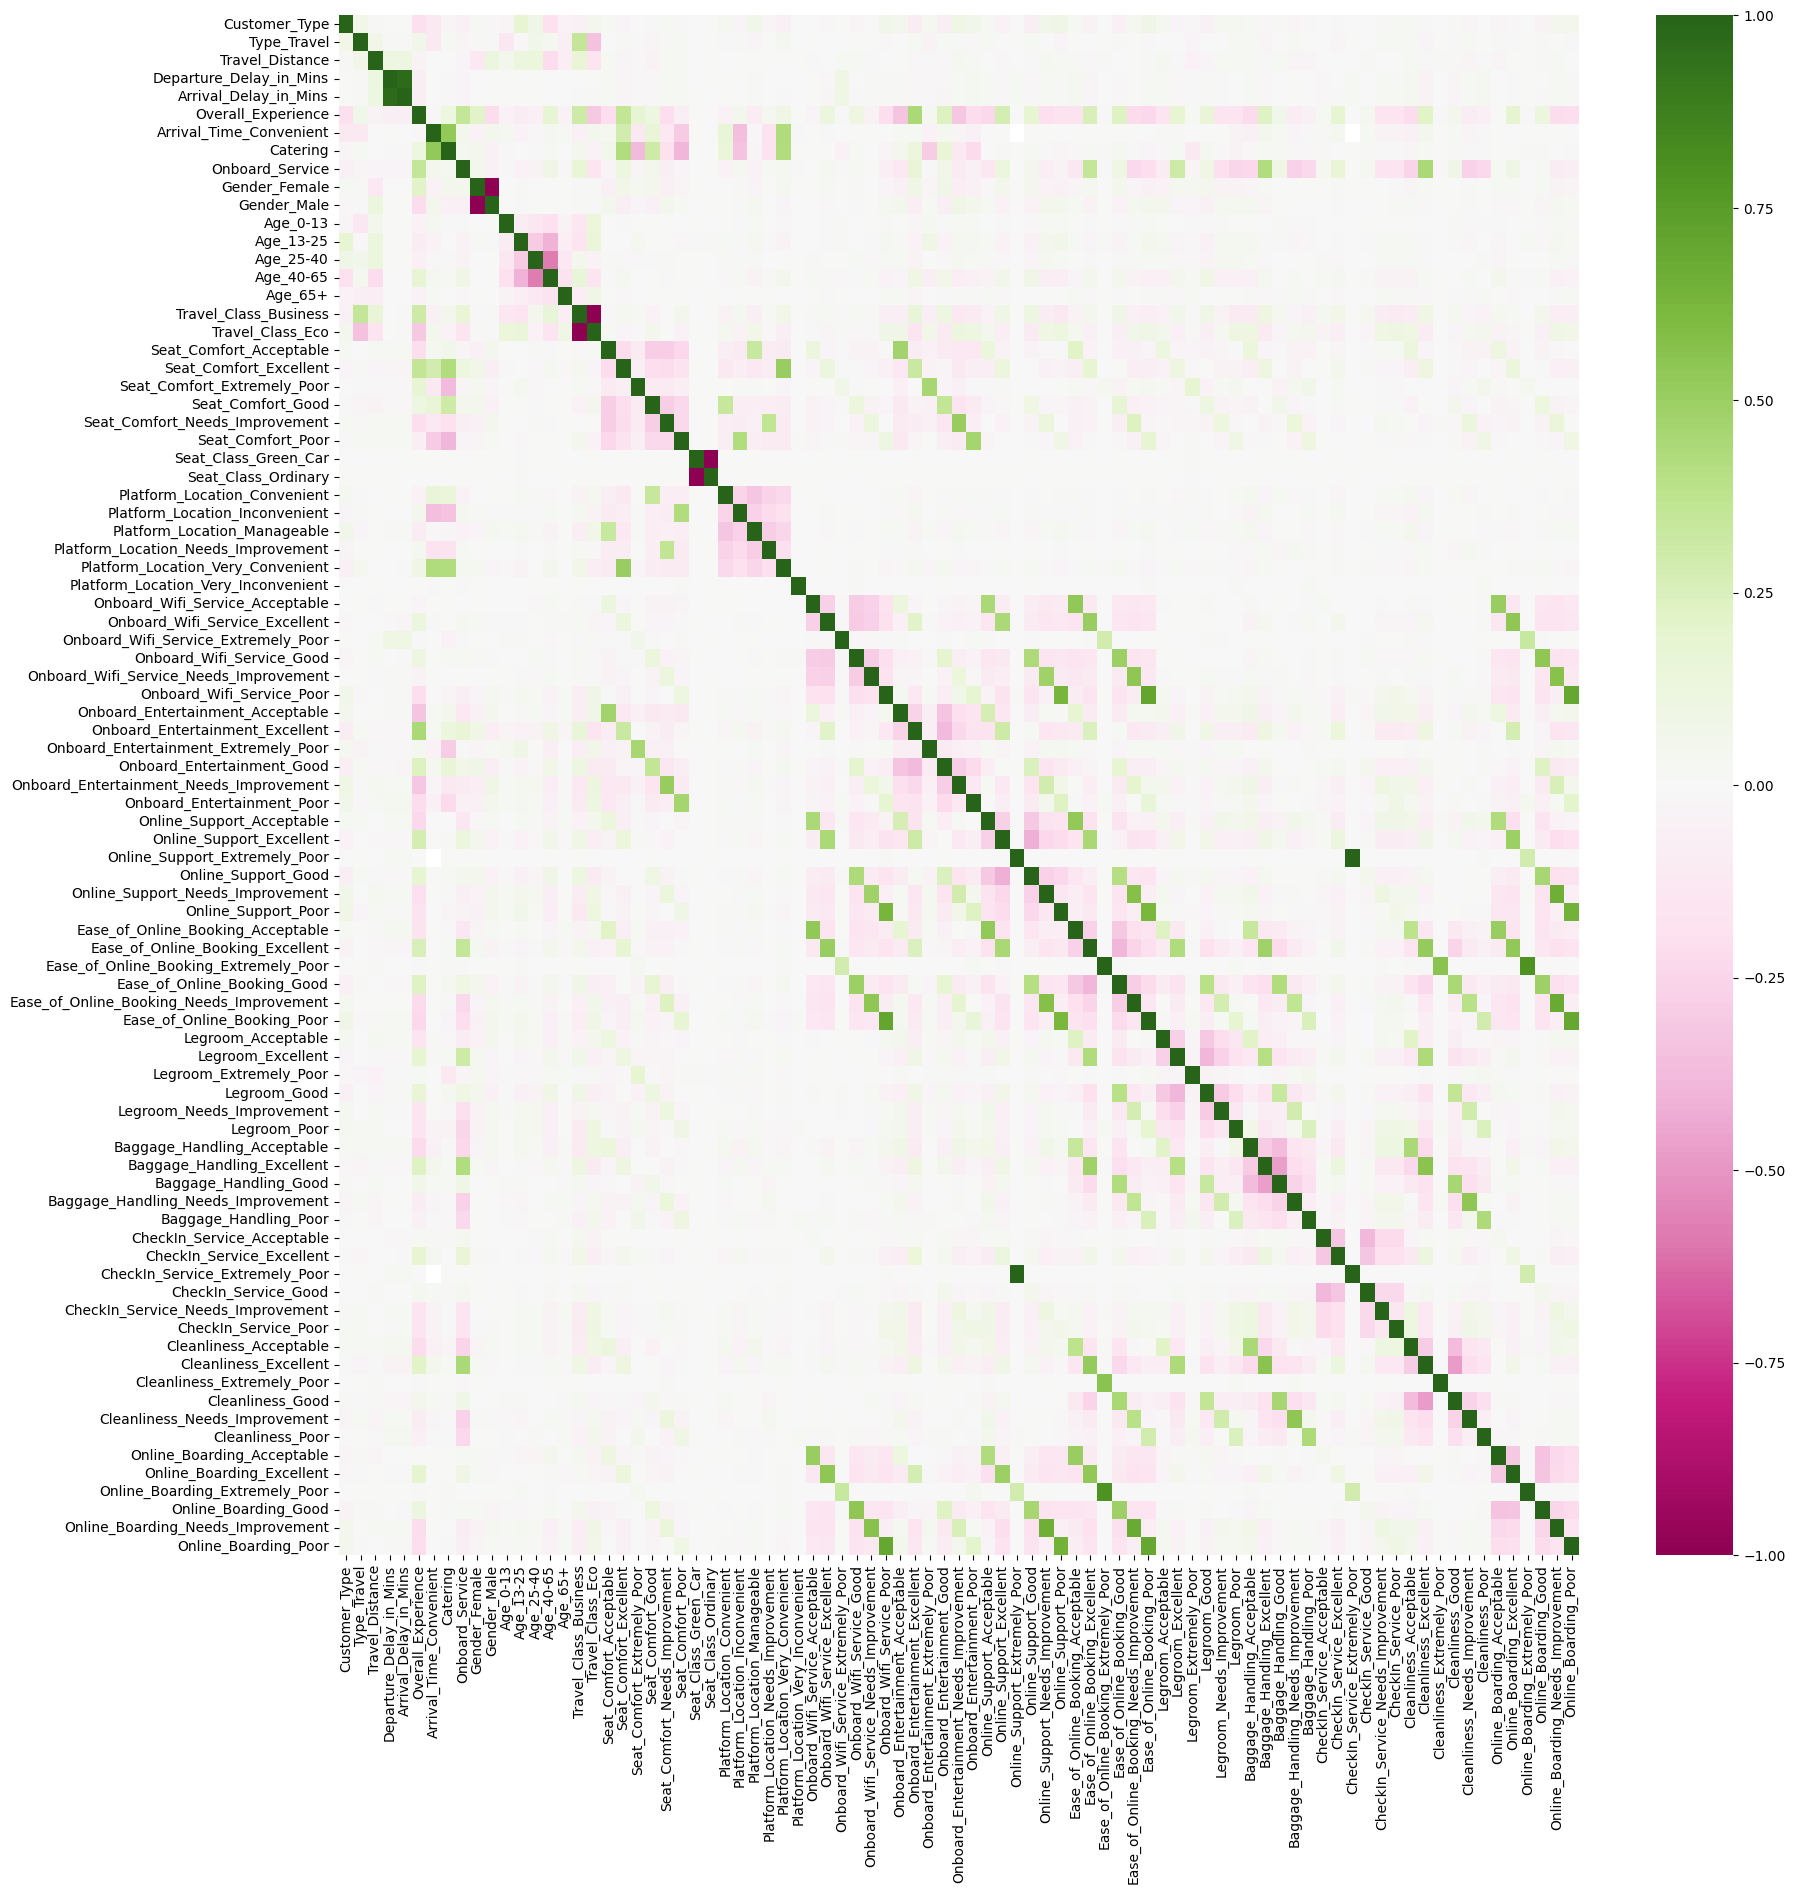

In [ ]:
plt.figure(figsize  = (20, 20))

num_cols = final_df.select_dtypes(include = "number").columns.to_list()

sns.heatmap(final_df[num_cols].corr(), annot = False, cmap = "PiYG")#cmap = "YlGnBu")

plt.show()

In [ ]:
# Dropping unnecessary columns (less than +- 0.15)
final_df.drop([

#  'Type_Travel',
#  'Travel_Distance',
#  'Departure_Delay_in_Mins',
#  'Arrival_Delay_in_Mins',
#  'Seat_Class',
#  'Arrival_Time_Convenient',
#  'Catering',
#  'Platform_Location'
], axis=1, inplace=True)

In [ ]:
final_df.shape, final_test.shape, final_all.shape

((94379, 85), (35602, 84), (94379, 85))

## **Model Evaluation**

In [ ]:
# Creating metric function

def metrics_score(actual, predicted, target_column=None):

    print(classification_report(actual, predicted, digits=6))

    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (8, 5))

    # Lets use labels that make sense (if target_column supplied)
    nan_lb = 'NaN'
    n = cm.shape[0]
    if target_column:
        match target_column:
            case 'Overall_Experience':
                axlb = ['Not Satisfied', 'Satisfied']
            case 'Type_Travel':
                axlb = ['Personal Travel', 'Business Travel']
            case 'Customer_Type':
                axlb = ['Loyal Customer', 'Disloyal Customer']
            case _:
                axlb = ['Extremely Poor', 'Poor', 'Needs Improvement', 'Acceptable', 'Good', 'Excellent']
    else:
        axlb = [''] * n
    if n == 3 or n == 7: axlb = [nan_lb, *axlb] if target_column else [nan_lb, *axlb[1:]]

    sns.heatmap(cm, annot = True, fmt = '.2f', xticklabels = axlb, yticklabels = axlb)

    plt.ylabel('Actual')

    plt.xlabel('Predicted')

    plt.show()
    return classification_report(actual, predicted, digits=6, output_dict=True)['accuracy']

In [ ]:
def model_performance_classification(model, predictors, target, ret_df=True):
    """
    Function to compute different metrics to check classification model performance

    model: classifier

    predictors: independent variables

    target: dependent variable
    """

    # Predicting using the independent variables
    pred = model.predict(predictors)

    recall = recall_score(target, pred,average = 'macro')                 # To compute recall

    precision = precision_score(target, pred, average = 'macro')              # To compute precision

    acc = accuracy_score(target, pred)                                 # To compute accuracy score

    dict_perf = {"Precision": precision, "Recall": recall, "Accuracy": acc}

    if ret_df:
        # Creating a dataframe of metrics
        return pd.DataFrame(dict_perf, index = [0])

    # Creating a dictionary of metrics
    return dict_perf

In [ ]:
def xgb_scores(estimator, X_train, X_test, y_train, y_test):
    train_score = estimator.score(X_train, y_train)
    sc_df_train = model_performance_classification(estimator,X_train, y_train, ret_df=False)

    test_score = estimator.score(X_test, y_test)
    sc_df_test = model_performance_classification(estimator,X_test, y_test, ret_df=False)

    print(f"""Model metrics:
    TRAIN ({(train_score+sum(sc_df_train.values()))/4.0:.3f}):\
    Score = {train_score:.3f}, Precision = {sc_df_train['Precision']:.3f}, Recall = {sc_df_train['Recall']:.3f}, Accuracy = {sc_df_train['Accuracy']:.3f}
    TEST  ({(test_score+sum(sc_df_test.values()))/4.0:.3f}):\
    Score = {test_score:.3f}, Precision = {sc_df_test['Precision']:.3f}, Recall = {sc_df_test['Recall']:.3f}, Accuracy = {sc_df_test['Accuracy']:.3f}
    """)

    return train_score, test_score, sc_df_train, sc_df_test

def simple_XGB_optimation(xgb,X,y,cv):
    Xv = X if isinstance(X, np.ndarray) else X.values
    yv = y if isinstance(y, np.ndarray) else y.values
    results = {}
    for i, (train, test) in enumerate(cv.split(X, y)):
        X_train = Xv[train]
        X_test = Xv[test]
        y_train = yv[train]
        y_test = yv[test]
        est = clone(xgb)
        est.fit(X_train, y_train, eval_set=[(X_test, y_test)])
        train_score, test_score, m_train_sc, m_test_sc = xgb_scores(
            est, X_train, X_test, y_train, y_test
        )
        results[i] = (est, train_score, test_score, m_train_sc, m_test_sc)
    # Choose the model with the best score (as the sum of all metrics)
    m = max(results.values(),key=lambda v: v[1]+v[2]+sum(v[3].values())+sum(v[4].values()))
    trs, tss, tr_m, ts_m = m[1:]
    print(f"""Metrics for best XGBoost model:
    TRAIN ({(trs+sum(tr_m.values()))/4.0:.3f}):  Score = {trs:.3f}, Precision = {tr_m['Precision']:.3f}, Recall = {tr_m['Recall']:.3f}, Accuracy = {tr_m['Accuracy']:.3f}
    TEST  ({(tss+sum(ts_m.values()))/4.0:.3f}):  Score = {tss:.3f}, Precision = {ts_m['Precision']:.3f}, Recall = {ts_m['Recall']:.3f}, Accuracy = {ts_m['Accuracy']:.3f}
    """)
    return m[0]

## **Impute by model**

In [ ]:
base_columns = final_df.columns.drop([*defer_columns, 'Overall_Experience']).tolist()

# Here are the deferred columns to be modelled:
# Impute all the other attributes (except Overall_Experience):
#Customer_Type              8951  --> factorized above (binary 0/1 with -1 for missing values)
#Type_Travel                9226  --> factorized above (binary 0/1 with -1 for missing values)
#Arrival_Time_Convenient    8930  --> Unprocessed (6 values)
#Catering                   8741  --> Unprocessed (6 values)
#Onboard_Service            7601  --> Unprocessed (6 values)

### Customer_Type

In [ ]:
target_column = 'Customer_Type'
columns = base_columns.copy()

# Why not use the whole dataset = final_test + final_df. ID is unique across both dataframes.
df = pd.concat(
    [
        final_df[[*columns, target_column]].dropna(),
        final_test[[*columns, target_column]].dropna()
    ]
)
final_df[target_column].value_counts(),merged_df[target_column].value_counts()

(Customer_Type
  0    69823
  1    15605
 -1     8951
 Name: count, dtype: int64,
 Customer_Type
 Loyal Customer       69823
 Disloyal Customer    15605
 Name: count, dtype: int64)

In [ ]:
df = df.query(target_column + ' in (0,1)')
df

,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Gender_Female,Gender_Male,Age_0-13,Age_13-25,Age_25-40,Age_40-65,Age_65+,...,Cleanliness_Good,Cleanliness_Needs_Improvement,Cleanliness_Poor,Online_Boarding_Acceptable,Online_Boarding_Excellent,Online_Boarding_Extremely_Poor,Online_Boarding_Good,Online_Boarding_Needs_Improvement,Online_Boarding_Poor,Customer_Type
ID,,,,,,,,,,,,,,,,,,,,,
98800001,272,0.0,5.0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
98800002,2200,9.0,0.0,0,1,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
98800003,1061,77.0,119.0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
98800004,780,13.0,18.0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
98800005,1981,0.0,0.0,1,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99935597,1667,0.0,0.0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
99935598,1334,0.0,0.0,0,1,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
99935599,1772,0.0,0.0,1,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,1


In [ ]:
# Create train and test datasets
pcnt = .7

# Random state is a seed value
train = df.sample(frac = pcnt, random_state = 14)
test = df.drop(train.index)

x_train = train[columns]
x_test = test[columns]

y_train = train[target_column]
y_test = test[target_column]

np.random.seed(0)

In [ ]:
rf = RandomForestClassifier(random_state = 1, criterion = 'entropy', class_weight = 'balanced')
rf = rf.fit(x_train, y_train)

              precision    recall  f1-score   support

           0   0.681879  0.895420  0.774195     22643
           1   0.574101  0.252312  0.350557     12651

    accuracy                       0.664901     35294
   macro avg   0.627990  0.573866  0.562376     35294
weighted avg   0.643246  0.664901  0.622344     35294



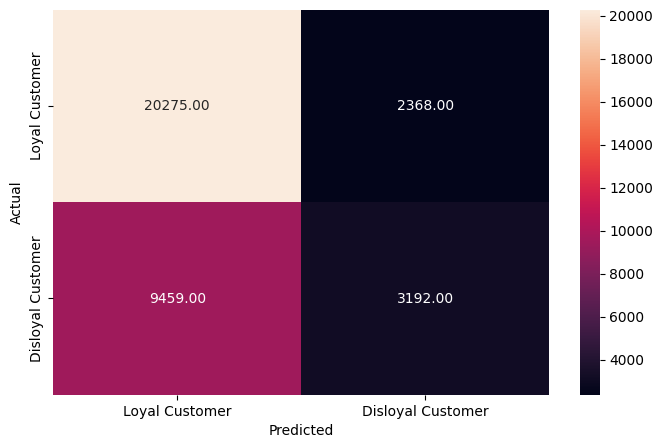

In [ ]:
# Checking performance on the test data
y_pred_test_rf = rf.predict(x_test)

test_rf_acc = metrics_score(y_test, y_pred_test_rf, target_column)

              precision    recall  f1-score   support

          -1   0.000000  0.000000  0.000000      8951
           0   0.878194  0.980536  0.926548     69823
           1   0.828735  0.871964  0.849800     15605

    accuracy                       0.869590     94379
   macro avg   0.568976  0.617500  0.592116     94379
weighted avg   0.786727  0.869590  0.825983     94379



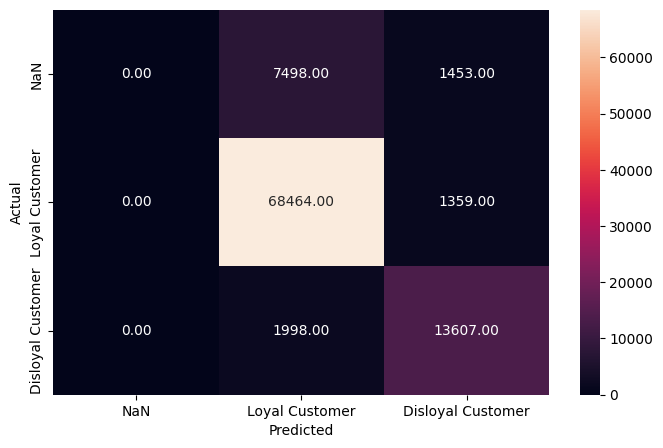

In [ ]:
# Checking performance on the all data
x_final_test = final_all[columns]
y_final_test = final_all[target_column]

y_pred_test_rf = rf.predict(x_final_test)

all_rf_acc = metrics_score(y_final_test, y_pred_test_rf, target_column)

In [ ]:
# Fitting the XGBoost-model
# Method 1) Use Cross-Validation on the dataset to find the best model.
X = df[columns]
y = df[target_column]

# cross-validator.
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=5)

# XGBoost Classifier
xgb_cv = XGBClassifier(
  random_state = 1,
  eval_metric = "logloss",
  tree_method = "hist",
  early_stopping_rounds = 4, # low number to avoid overfitting
)

# Pick the best from the cross validation above
xgb_cv = simple_XGB_optimation(xgb_cv, X, y, cv)

# Method 2) Use the current train/test chunks
xgb_m = XGBClassifier(random_state = 1, eval_metric = "logloss")
xgb_m = xgb_m.fit(x_train, y_train)

[0]	validation_0-logloss:0.64226
[1]	validation_0-logloss:0.63744
[2]	validation_0-logloss:0.63473
[3]	validation_0-logloss:0.63315
[4]	validation_0-logloss:0.63146
[5]	validation_0-logloss:0.63006
[6]	validation_0-logloss:0.62881
[7]	validation_0-logloss:0.62739
[8]	validation_0-logloss:0.62581
[9]	validation_0-logloss:0.62471
[10]	validation_0-logloss:0.62451
[11]	validation_0-logloss:0.62374
[12]	validation_0-logloss:0.62321
[13]	validation_0-logloss:0.62291
[14]	validation_0-logloss:0.62242
[15]	validation_0-logloss:0.62225
[16]	validation_0-logloss:0.62245
[17]	validation_0-logloss:0.62245
[18]	validation_0-logloss:0.62232
[19]	validation_0-logloss:0.62255
Model metrics:
    TRAIN (0.660):    Score = 0.687, Precision = 0.678, Recall = 0.588, Accuracy = 0.687
    TEST  (0.647):    Score = 0.677, Precision = 0.657, Recall = 0.576, Accuracy = 0.677
    
[0]	validation_0-logloss:0.64301
[1]	validation_0-logloss:0.63891
[2]	validation_0-logloss:0.63600
[3]	validation_0-logloss:0.63298


              precision    recall  f1-score   support

           0   0.688651  0.898291  0.779624     22643
           1   0.600035  0.273101  0.375360     12651

    accuracy                       0.674194     35294
   macro avg   0.644343  0.585696  0.577492     35294
weighted avg   0.656887  0.674194  0.634717     35294



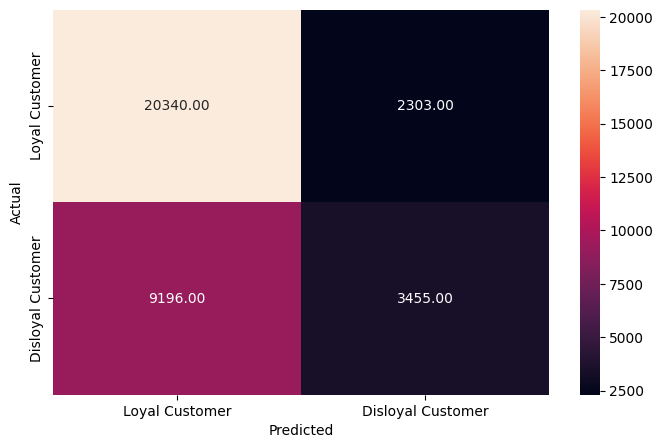

              precision    recall  f1-score   support

           0   0.691846  0.926291  0.792084     22643
           1   0.664725  0.261560  0.375404     12651

    accuracy                       0.688021     35294
   macro avg   0.678285  0.593926  0.583744     35294
weighted avg   0.682124  0.688021  0.642727     35294



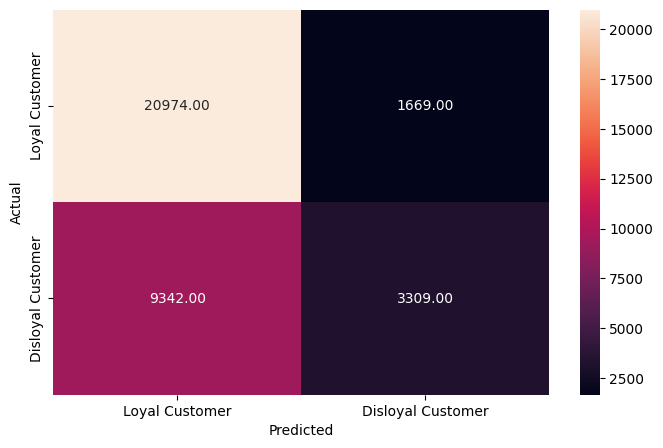

In [ ]:
# Checking performance on the test data
y_pred_test_xgb_m = xgb_m.predict(x_test)
y_pred_test_xgb_cv = xgb_cv.predict(x_test)

test_xgbm_acc = metrics_score(y_test, y_pred_test_xgb_m, target_column)
test_xgbcv_acc = metrics_score(y_test, y_pred_test_xgb_cv, target_column)

              precision    recall  f1-score   support

          -1   0.000000  0.000000  0.000000      8951
           0   0.847902  0.962720  0.901671     69823
           1   0.726177  0.702723  0.714258     15605

    accuracy                       0.828426     94379
   macro avg   0.524693  0.555148  0.538643     94379
weighted avg   0.747360  0.828426  0.785168     94379



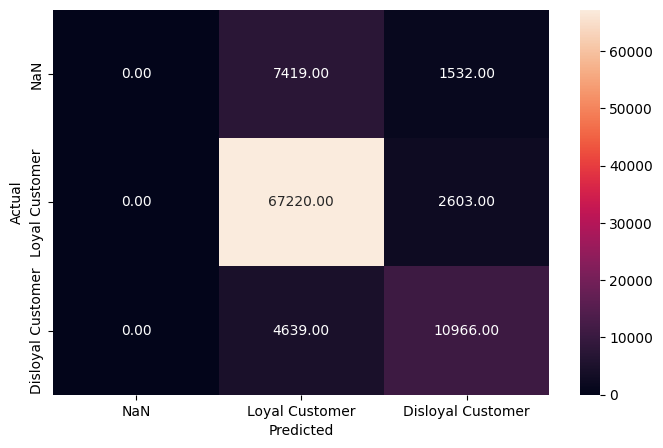

              precision    recall  f1-score   support

          -1   0.000000  0.000000  0.000000      8951
           0   0.832097  0.968477  0.895122     69823
           1   0.732611  0.615572  0.669011     15605

    accuracy                       0.818275     94379
   macro avg   0.521569  0.528016  0.521378     94379
weighted avg   0.736730  0.818275  0.772842     94379



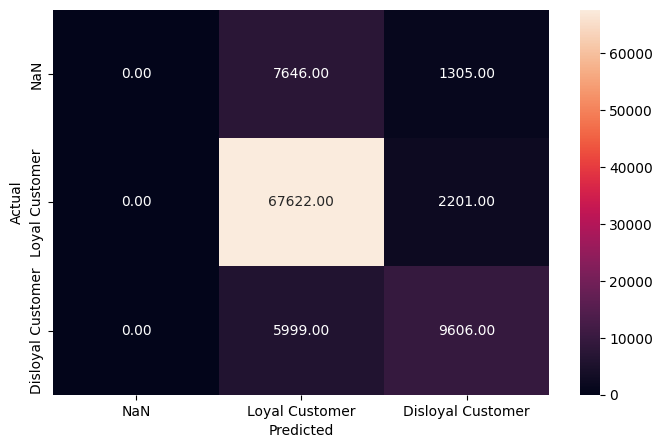

In [ ]:
# Checking performance on the all data
x_final_test = final_all[columns]
y_final_test = final_all[target_column]

y_pred_test_xgb_m = xgb_m.predict(x_final_test)
y_pred_test_xgb_cv = xgb_cv.predict(x_final_test)

all_xgbm_acc = metrics_score(y_final_test, y_pred_test_xgb_m, target_column)
all_xgbcv_acc = metrics_score(y_final_test, y_pred_test_xgb_cv, target_column)

### Update data based on models above.

In [ ]:
# Update data based on the model where missing values are.
x_final_all = final_all.loc[indices_all[target_column], columns]
x_final_test = final_test.loc[indices_test[target_column], columns]
# Which model to use? Choose the one with the best average accuacy!
x_final_model = max({
    rf: (test_rf_acc + all_rf_acc) ,
    xgb_m: (test_xgbm_acc + all_xgbm_acc),
    xgb_cv: (test_xgbcv_acc + all_xgbcv_acc)
  }.items(),
  key=lambda x: x[1]
)[0]
final_df.update(
    pd.Series(
        x_final_model.predict(x_final_all),
        name=target_column
    ).set_axis(indices_all[target_column]), # indices to update
)
final_all.update(
    pd.Series(
        x_final_model.predict(x_final_all),
        name=target_column
    ).set_axis(indices_all[target_column]), # indices to update
)
final_test.update(
    pd.Series(
        x_final_model.predict(x_final_test),
        name=target_column
    ).set_axis(indices_test[target_column]), #indices to update
)

### Type_Travel

In [ ]:
target_column = 'Type_Travel'
columns = base_columns.copy()

# Why not use the whole dataset = final_test + final_df. ID is unique across both dataframes.
df = pd.concat(
    [
        final_df[[*columns, target_column]].dropna(),
        final_test[[*columns, target_column]].dropna()
    ]
)
final_df[target_column].value_counts(),merged_df[target_column].value_counts()

(Type_Travel
  1    58617
  0    26536
 -1     9226
 Name: count, dtype: int64,
 Type_Travel
 Business Travel    58617
 Personal Travel    26536
 Name: count, dtype: int64)

In [ ]:
df = df.query(target_column + ' in (0,1)')
df

,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Gender_Female,Gender_Male,Age_0-13,Age_13-25,Age_25-40,Age_40-65,Age_65+,...,Cleanliness_Good,Cleanliness_Needs_Improvement,Cleanliness_Poor,Online_Boarding_Acceptable,Online_Boarding_Excellent,Online_Boarding_Extremely_Poor,Online_Boarding_Good,Online_Boarding_Needs_Improvement,Online_Boarding_Poor,Type_Travel
ID,,,,,,,,,,,,,,,,,,,,,
98800002,2200,9.0,0.0,0,1,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
98800003,1061,77.0,119.0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
98800004,780,13.0,18.0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
98800005,1981,0.0,0.0,1,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,1
98800006,2810,0.0,0.0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99935598,1334,0.0,0.0,0,1,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
99935599,1772,0.0,0.0,1,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
99935600,1180,0.0,0.0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
# Create train and test datasets
pcnt = .7

# Random state is a seed value
train = df.sample(frac = pcnt, random_state = 14) # I like this random_state number !
test = df.drop(train.index)

x_train = train[columns]
x_test = test[columns]

y_train = train[target_column]
y_test = test[target_column]

np.random.seed(0)

In [ ]:
rf = RandomForestClassifier(random_state = 1, criterion = 'entropy', class_weight = 'balanced')
rf = rf.fit(x_train, y_train)

              precision    recall  f1-score   support

           0   0.610604  0.461276  0.525538     14655
           1   0.672692  0.790086  0.726678     20537

    accuracy                       0.653160     35192
   macro avg   0.641648  0.625681  0.626108     35192
weighted avg   0.646837  0.653160  0.642918     35192



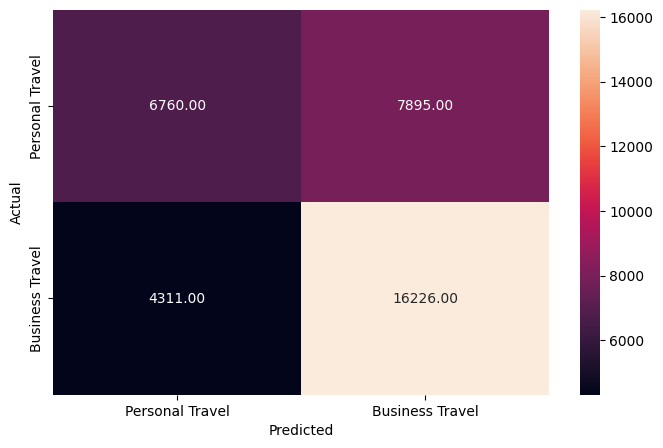

In [ ]:
# Checking performance on the test data
y_pred_test_rf = rf.predict(x_test)

test_rf_acc = metrics_score(y_test, y_pred_test_rf, target_column)

              precision    recall  f1-score   support

          -1   0.000000  0.000000  0.000000      9226
           0   0.833023  0.927985  0.877944     26536
           1   0.872505  0.964805  0.916337     58617

    accuracy                       0.860138     94379
   macro avg   0.568509  0.630930  0.598093     94379
weighted avg   0.776112  0.860138  0.815966     94379



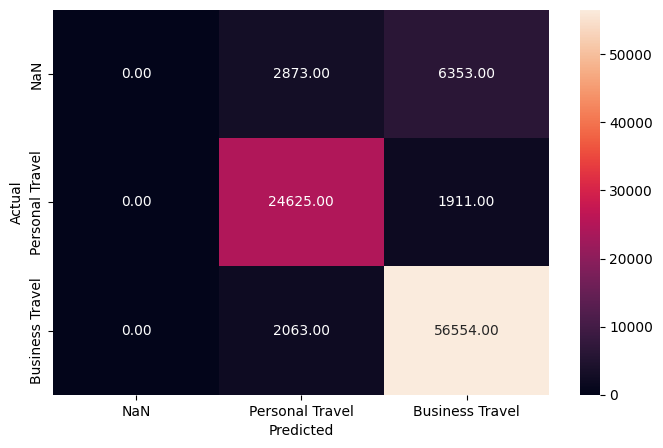

In [ ]:
# Checking performance on the all data
x_final_test = final_all[columns]
y_final_test = final_all[target_column]

y_pred_test_rf = rf.predict(x_final_test)

all_rf_acc = metrics_score(y_final_test, y_pred_test_rf, target_column)

In [ ]:
# Fitting the XGBoost-model
# Method 1) Use Cross-Validation on the dataset to find the best model.
X = df[columns]
y = df[target_column]

# cross-validator.
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=5)

# XGBoost Classifier
xgb_cv = XGBClassifier(
  random_state = 1,
  eval_metric = "logloss",
  tree_method = "hist",
  early_stopping_rounds = 4, # low number to avoid overfitting
)

# Pick the best from the cross validation above
xgb_cv = simple_XGB_optimation(xgb_cv, X, y, cv)

# Method 2) Use the current train/test chunks
xgb_m = XGBClassifier(random_state = 1, eval_metric = "logloss")
xgb_m = xgb_m.fit(x_train, y_train)

[0]	validation_0-logloss:0.65966
[1]	validation_0-logloss:0.64956
[2]	validation_0-logloss:0.64362
[3]	validation_0-logloss:0.64081
[4]	validation_0-logloss:0.63904
[5]	validation_0-logloss:0.63634
[6]	validation_0-logloss:0.63450
[7]	validation_0-logloss:0.63394
[8]	validation_0-logloss:0.63366
[9]	validation_0-logloss:0.63366
[10]	validation_0-logloss:0.63321
[11]	validation_0-logloss:0.63286
[12]	validation_0-logloss:0.63290
[13]	validation_0-logloss:0.63254
[14]	validation_0-logloss:0.63215
[15]	validation_0-logloss:0.63228
[16]	validation_0-logloss:0.63184
[17]	validation_0-logloss:0.63191
[18]	validation_0-logloss:0.63201
[19]	validation_0-logloss:0.63205
Model metrics:
    TRAIN (0.670):    Score = 0.678, Precision = 0.673, Recall = 0.649, Accuracy = 0.678
    TEST  (0.651):    Score = 0.661, Precision = 0.652, Recall = 0.631, Accuracy = 0.661
    
[0]	validation_0-logloss:0.66008
[1]	validation_0-logloss:0.64985
[2]	validation_0-logloss:0.64458
[3]	validation_0-logloss:0.64004


              precision    recall  f1-score   support

           0   0.636601  0.466189  0.538228     14655
           1   0.680172  0.810099  0.739472     20537

    accuracy                       0.666885     35192
   macro avg   0.658386  0.638144  0.638850     35192
weighted avg   0.662027  0.666885  0.655668     35192



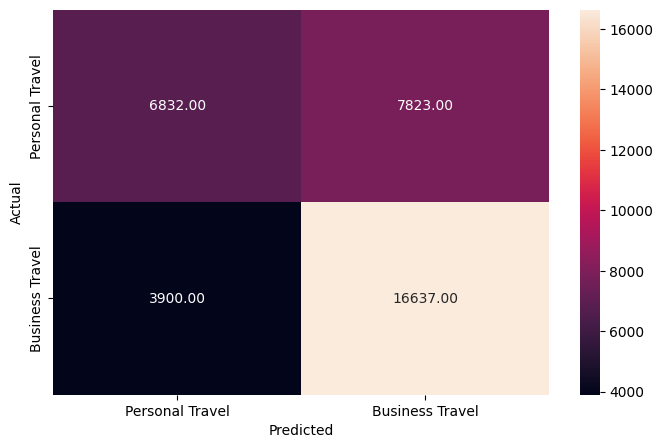

              precision    recall  f1-score   support

           0   0.664672  0.462436  0.545411     14655
           1   0.684830  0.833520  0.751894     20537

    accuracy                       0.678990     35192
   macro avg   0.674751  0.647978  0.648652     35192
weighted avg   0.676436  0.678990  0.665908     35192



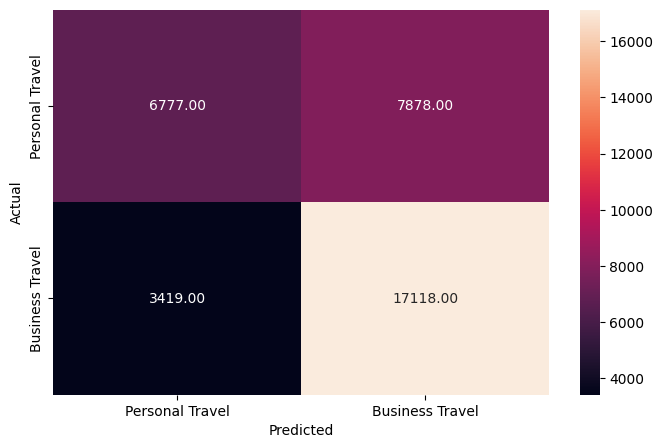

In [ ]:
# Checking performance on the test data
y_pred_test_xgb_m = xgb_m.predict(x_test)
y_pred_test_xgb_cv = xgb_cv.predict(x_test)

test_xgbm_acc = metrics_score(y_test, y_pred_test_xgb_m, target_column)
test_xgbcv_acc = metrics_score(y_test, y_pred_test_xgb_cv, target_column)

              precision    recall  f1-score   support

          -1   0.000000  0.000000  0.000000      9226
           0   0.760066  0.819528  0.788678     26536
           1   0.830340  0.931624  0.878071     58617

    accuracy                       0.809036     94379
   macro avg   0.530135  0.583717  0.555583     94379
weighted avg   0.729412  0.809036  0.767101     94379



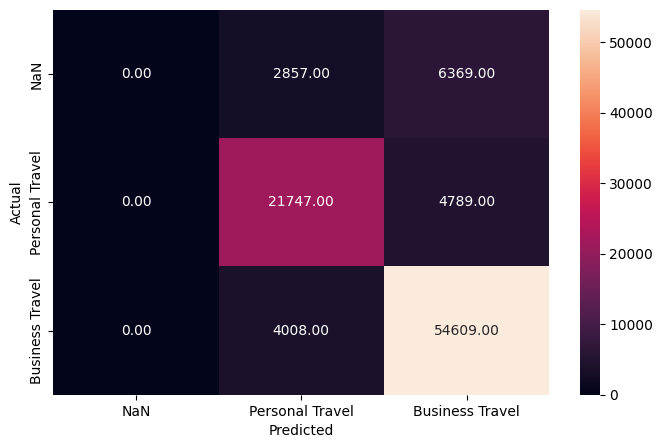

              precision    recall  f1-score   support

          -1   0.000000  0.000000  0.000000      9226
           0   0.744142  0.769521  0.756619     26536
           1   0.811064  0.926199  0.864816     58617

    accuracy                       0.791606     94379
   macro avg   0.518402  0.565240  0.540478     94379
weighted avg   0.712963  0.791606  0.749855     94379



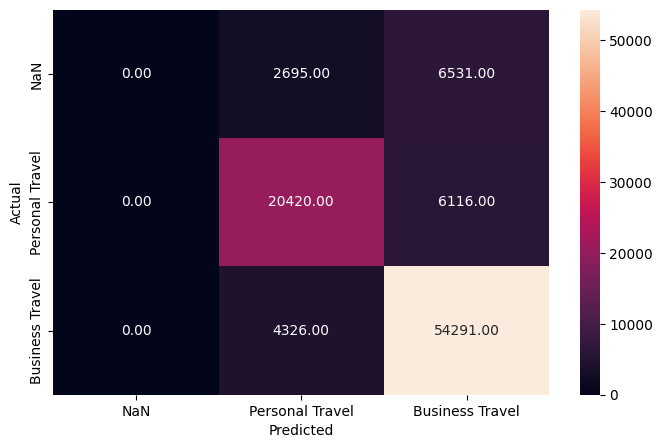

In [ ]:
# Checking performance on the all data
x_final_test = final_all[columns]
y_final_test = final_all[target_column]

y_pred_test_xgb_m = xgb_m.predict(x_final_test)
y_pred_test_xgb_cv = xgb_cv.predict(x_final_test)

all_xgbm_acc = metrics_score(y_final_test, y_pred_test_xgb_m, target_column)
all_xgbcv_acc = metrics_score(y_final_test, y_pred_test_xgb_cv, target_column)

### Update data based on models above.

In [ ]:
# Update data based on the model where missing values are.
x_final_all = final_all.loc[indices_all[target_column], columns]
x_final_test = final_test.loc[indices_test[target_column], columns]
# Which model to use? Choose the one with the best average accuacy!
x_final_model = max({
    rf: (test_rf_acc + all_rf_acc) ,
    xgb_m: (test_xgbm_acc + all_xgbm_acc),
    xgb_cv: (test_xgbcv_acc + all_xgbcv_acc)
  }.items(),
  key=lambda x: x[1]
)[0]
final_df.update(
    pd.Series(
        x_final_model.predict(x_final_all),
        name=target_column
    ).set_axis(indices_all[target_column]), # indices to update
)
final_all.update(
    pd.Series(
        x_final_model.predict(x_final_all),
        name=target_column
    ).set_axis(indices_all[target_column]), # indices to update
)
final_test.update(
    pd.Series(
        x_final_model.predict(x_final_test),
        name=target_column
    ).set_axis(indices_test[target_column]), #indices to update
)

### Arrival_Time_Convenient

In [ ]:
target_column = 'Arrival_Time_Convenient'
columns = base_columns.copy()

# Why not use the whole dataset = final_test + final_df. ID is unique across both dataframes.
df = pd.concat(
    [
        final_df[[*columns, target_column]].dropna(),
        final_test[[*columns, target_column]].dropna()
    ]
)
final_df[target_column].value_counts(),merged_df[target_column].value_counts()

(Arrival_Time_Convenient
 4.0    19574
 5.0    17684
 3.0    15177
 2.0    14990
 1.0    13692
 0.0     4332
 Name: count, dtype: int64,
 Arrival_Time_Convenient
 Good                 19574
 Excellent            17684
 Acceptable           15177
 Needs Improvement    14990
 Poor                 13692
 Extremely Poor        4332
 Name: count, dtype: int64)

In [ ]:
df

,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Gender_Female,Gender_Male,Age_0-13,Age_13-25,Age_25-40,Age_40-65,Age_65+,...,Cleanliness_Good,Cleanliness_Needs_Improvement,Cleanliness_Poor,Online_Boarding_Acceptable,Online_Boarding_Excellent,Online_Boarding_Extremely_Poor,Online_Boarding_Good,Online_Boarding_Needs_Improvement,Online_Boarding_Poor,Arrival_Time_Convenient
ID,,,,,,,,,,,,,,,,,,,,,
98800001,272,0.0,5.0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,5.0
98800002,2200,9.0,0.0,0,1,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,5.0
98800003,1061,77.0,119.0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,2.0
98800004,780,13.0,18.0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,2.0
98800005,1981,0.0,0.0,1,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99935598,1334,0.0,0.0,0,1,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,5.0
99935599,1772,0.0,0.0,1,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,2.0
99935600,1180,0.0,0.0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0.0


In [ ]:
# Create train and test datasets
pcnt = .7

# Random state is a seed value
train = df.sample(frac = pcnt, random_state = 14)
test = df.drop(train.index)

x_train = train[columns]
x_test = test[columns]

y_train = train[target_column]
y_test = test[target_column]

np.random.seed(0)

In [ ]:
rf = RandomForestClassifier(random_state = 1, criterion = 'entropy', class_weight = 'balanced')
rf = rf.fit(x_train, y_train)

              precision    recall  f1-score   support

         0.0   0.539142  0.432551  0.480000      1831
         1.0   0.829342  0.780756  0.804316      5633
         2.0   0.769146  0.790573  0.779712      6174
         3.0   0.742300  0.760787  0.751430      6304
         4.0   0.664725  0.718465  0.690551      8102
         5.0   0.743483  0.713638  0.728255      7274

    accuracy                       0.732743     35318
   macro avg   0.714690  0.699462  0.705711     35318
weighted avg   0.732791  0.732743  0.731998     35318



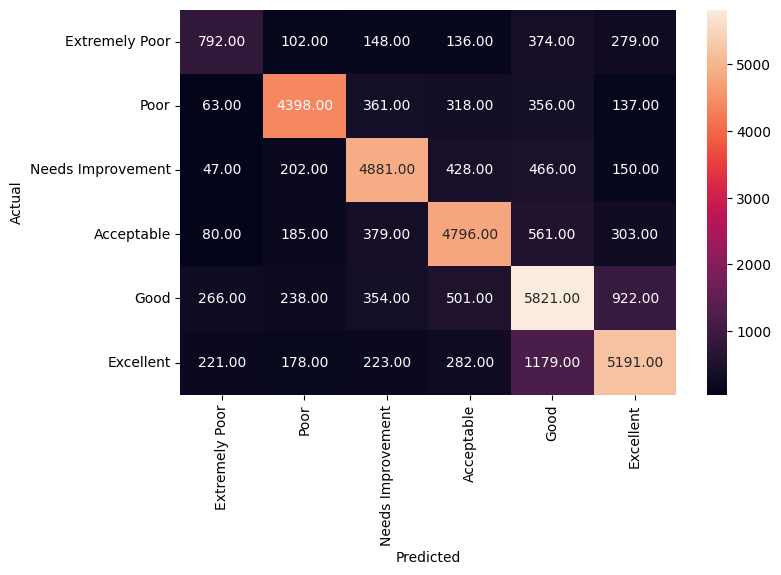

In [ ]:
# Checking performance on the test data
y_pred_test_rf = rf.predict(x_test)

test_rf_acc = metrics_score(y_test, y_pred_test_rf, target_column)

              precision    recall  f1-score   support

        -1.0   0.000000  0.000000  0.000000      8930
         0.0   0.802858  0.830102  0.816252      4332
         1.0   0.865295  0.933611  0.898156     13692
         2.0   0.840982  0.938826  0.887215     14990
         3.0   0.833491  0.928444  0.878409     15177
         4.0   0.807938  0.916164  0.858655     19574
         5.0   0.838474  0.914669  0.874915     17684

    accuracy                       0.833353     94379
   macro avg   0.712720  0.780259  0.744800     94379
weighted avg   0.754659  0.833353  0.791954     94379



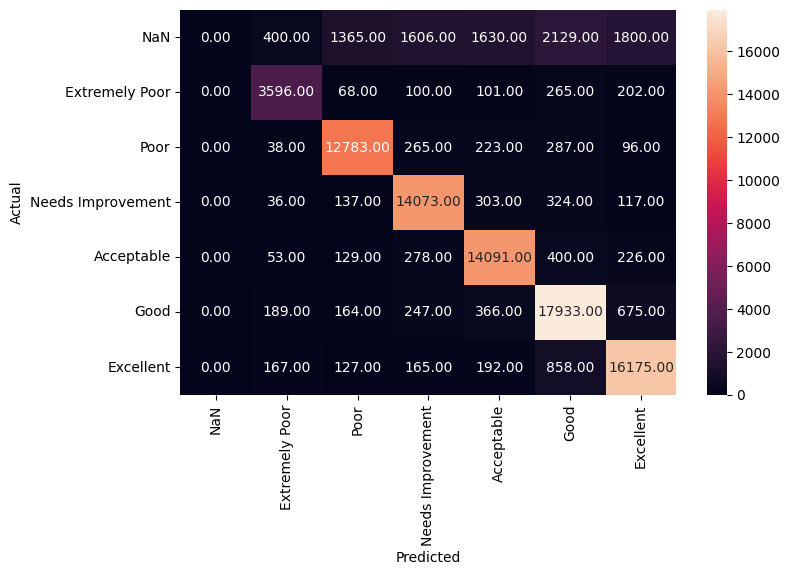

In [ ]:
# Checking performance on the all data
x_final_test = final_all[columns].fillna(-1)
y_final_test = final_all[target_column].fillna(-1)

y_pred_test_rf = rf.predict(x_final_test)

all_rf_acc = metrics_score(y_final_test, y_pred_test_rf, target_column)

In [ ]:
# Fitting the XGBoost-model
# Method 1) Use Cross-Validation on the dataset to find the best model.
X = df[columns]
y = df[target_column]

# cross-validator.
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=5)

# XGBoost Classifier
xgb_cv = XGBClassifier(
  random_state = 1,
  eval_metric = "mlogloss", # For multi-class use mlogloss
  tree_method = "hist",
  early_stopping_rounds = 4, # low number to avoid overfitting
)

# Pick the best from the cross validation above
xgb_cv = simple_XGB_optimation(xgb_cv, X, y, cv)

# Method 2) Use the current train/test chunks
xgb_m = XGBClassifier(random_state = 1, eval_metric = "mlogloss")
xgb_m = xgb_m.fit(x_train, y_train)

[0]	validation_0-mlogloss:1.38428
[1]	validation_0-mlogloss:1.19787
[2]	validation_0-mlogloss:1.08243
[3]	validation_0-mlogloss:1.00325
[4]	validation_0-mlogloss:0.94857
[5]	validation_0-mlogloss:0.90975
[6]	validation_0-mlogloss:0.88098
[7]	validation_0-mlogloss:0.85932
[8]	validation_0-mlogloss:0.84393
[9]	validation_0-mlogloss:0.83105
[10]	validation_0-mlogloss:0.82158
[11]	validation_0-mlogloss:0.81398
[12]	validation_0-mlogloss:0.80764
[13]	validation_0-mlogloss:0.80246
[14]	validation_0-mlogloss:0.79752
[15]	validation_0-mlogloss:0.79388
[16]	validation_0-mlogloss:0.79090
[17]	validation_0-mlogloss:0.78867
[18]	validation_0-mlogloss:0.78664
[19]	validation_0-mlogloss:0.78416
[20]	validation_0-mlogloss:0.78174
[21]	validation_0-mlogloss:0.78019
[22]	validation_0-mlogloss:0.77893
[23]	validation_0-mlogloss:0.77670
[24]	validation_0-mlogloss:0.77595
[25]	validation_0-mlogloss:0.77476
[26]	validation_0-mlogloss:0.77372
[27]	validation_0-mlogloss:0.77298
[28]	validation_0-mlogloss:0.7

              precision    recall  f1-score   support

         0.0   0.553012  0.501365  0.525924      1831
         1.0   0.839173  0.778093  0.807480      5633
         2.0   0.777831  0.788792  0.783273      6174
         3.0   0.746516  0.764753  0.755524      6304
         4.0   0.664388  0.719822  0.690995      8102
         5.0   0.748198  0.713638  0.730509      7274

    accuracy                       0.736593     35318
   macro avg   0.721520  0.711077  0.715618     35318
weighted avg   0.738243  0.736593  0.736803     35318



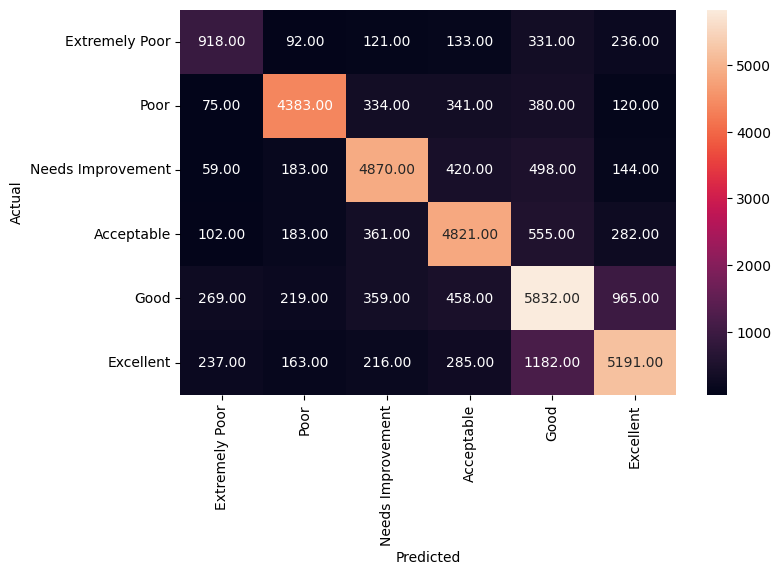

              precision    recall  f1-score   support

         0.0   0.624396  0.564719  0.593060      1831
         1.0   0.865823  0.801882  0.832627      5633
         2.0   0.806835  0.814545  0.810671      6174
         3.0   0.771895  0.795527  0.783533      6304
         4.0   0.709568  0.771661  0.739313      8102
         5.0   0.800840  0.760104  0.779941      7274

    accuracy                       0.775129     35318
   macro avg   0.763226  0.751406  0.756524     35318
weighted avg   0.777000  0.775129  0.775348     35318



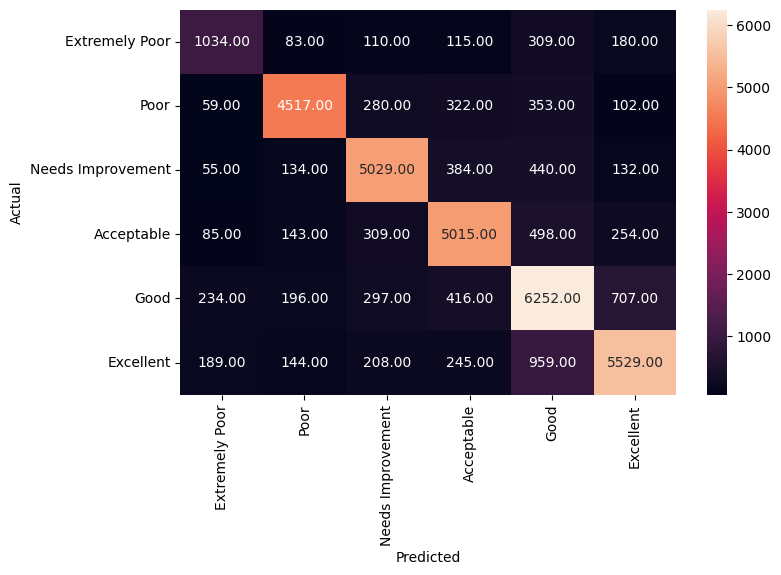

In [ ]:
# Checking performance on the test data
y_pred_test_xgb_m = xgb_m.predict(x_test)
y_pred_test_xgb_cv = xgb_cv.predict(x_test)

test_xgbm_acc = metrics_score(y_test, y_pred_test_xgb_m, target_column)
test_xgbcv_acc = metrics_score(y_test, y_pred_test_xgb_cv, target_column)

              precision    recall  f1-score   support

        -1.0   0.000000  0.000000  0.000000      8930
         0.0   0.583524  0.588643  0.586072      4332
         1.0   0.782523  0.808355  0.795229     13692
         2.0   0.740028  0.825484  0.780423     14990
         3.0   0.707890  0.802201  0.752100     15177
         4.0   0.652744  0.777664  0.709750     19574
         5.0   0.728698  0.767473  0.747583     17684

    accuracy                       0.709490     94379
   macro avg   0.599344  0.652831  0.624451     94379
weighted avg   0.643595  0.709490  0.674443     94379



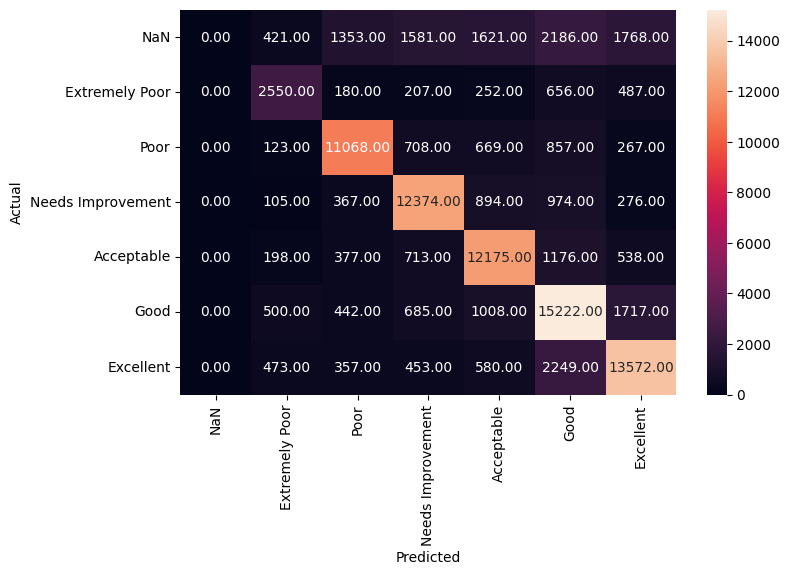

              precision    recall  f1-score   support

        -1.0   0.000000  0.000000  0.000000      8930
         0.0   0.561832  0.557941  0.559880      4332
         1.0   0.777172  0.801125  0.788966     13692
         2.0   0.735195  0.813276  0.772267     14990
         3.0   0.695560  0.795744  0.742286     15177
         4.0   0.638557  0.767906  0.697284     19574
         5.0   0.718491  0.750792  0.734286     17684

    accuracy                       0.698905     94379
   macro avg   0.589544  0.640969  0.613567     94379
weighted avg   0.634218  0.698905  0.664381     94379



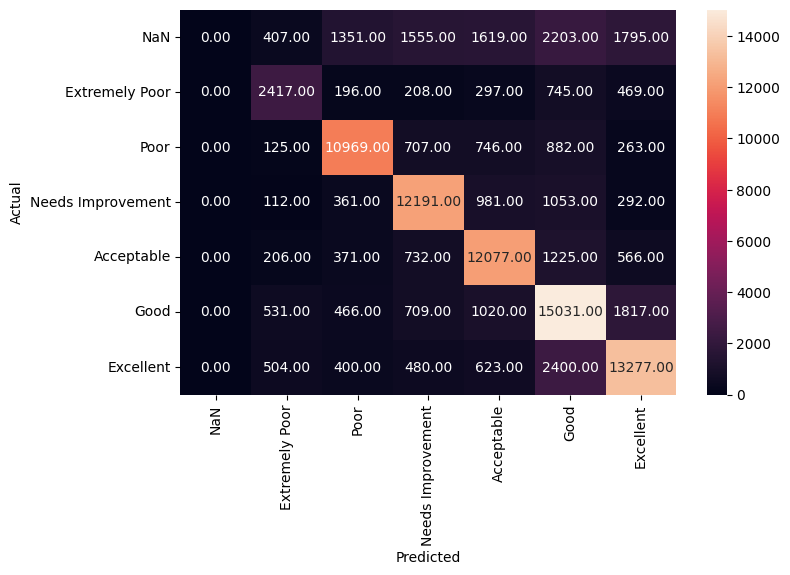

In [ ]:
# Checking performance on the all data
x_final_test = final_all[columns].fillna(-1)
y_final_test = final_all[target_column].fillna(-1)

y_pred_test_xgb_m = xgb_m.predict(x_final_test)
y_pred_test_xgb_cv = xgb_cv.predict(x_final_test)

all_xgbm_acc = metrics_score(y_final_test, y_pred_test_xgb_m, target_column)
all_xgbcv_acc = metrics_score(y_final_test, y_pred_test_xgb_cv, target_column)

### Update data based on models above.

In [ ]:
# Update data based on the model where missing values are.
x_final_all = final_all.loc[indices_all[target_column], columns]
x_final_test = final_test.loc[indices_test[target_column], columns]
# Which model to use? Choose the one with the best average accuacy!
x_final_model = max({
    rf: (test_rf_acc + all_rf_acc) ,
    xgb_m: (test_xgbm_acc + all_xgbm_acc),
    xgb_cv: (test_xgbcv_acc + all_xgbcv_acc)
  }.items(),
  key=lambda x: x[1]
)[0]
final_df.update(
    pd.Series(
        x_final_model.predict(x_final_all),
        name=target_column
    ).set_axis(indices_all[target_column]), # indices to update
)
final_all.update(
    pd.Series(
        x_final_model.predict(x_final_all),
        name=target_column
    ).set_axis(indices_all[target_column]), # indices to update
)
final_test.update(
    pd.Series(
        x_final_model.predict(x_final_test),
        name=target_column
    ).set_axis(indices_test[target_column]), #indices to update
)

### Catering

In [ ]:
target_column = 'Catering'
columns = base_columns.copy()

# Why not use the whole dataset = final_test + final_df. ID is unique across both dataframes.
df = pd.concat(
    [
        final_df[[*columns, target_column]].dropna(),
        final_test[[*columns, target_column]].dropna()
    ]
)
final_df[target_column].value_counts(),merged_df[target_column].value_counts()

(Catering
 3.0    18468
 2.0    17978
 4.0    17969
 1.0    13858
 5.0    13455
 0.0     3910
 Name: count, dtype: int64,
 Catering
 Acceptable           18468
 Needs Improvement    17978
 Good                 17969
 Poor                 13858
 Excellent            13455
 Extremely Poor        3910
 Name: count, dtype: int64)

In [ ]:
df

,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Gender_Female,Gender_Male,Age_0-13,Age_13-25,Age_25-40,Age_40-65,Age_65+,...,Cleanliness_Good,Cleanliness_Needs_Improvement,Cleanliness_Poor,Online_Boarding_Acceptable,Online_Boarding_Excellent,Online_Boarding_Extremely_Poor,Online_Boarding_Good,Online_Boarding_Needs_Improvement,Online_Boarding_Poor,Catering
ID,,,,,,,,,,,,,,,,,,,,,
98800001,272,0.0,5.0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,5.0
98800002,2200,9.0,0.0,0,1,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,1.0
98800003,1061,77.0,119.0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,2.0
98800005,1981,0.0,0.0,1,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,3.0
98800006,2810,0.0,0.0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99935598,1334,0.0,0.0,0,1,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,2.0
99935599,1772,0.0,0.0,1,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,4.0
99935600,1180,0.0,0.0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,4.0


In [ ]:
# Create train and test datasets
pcnt = .7

# Random state is a seed value
train = df.sample(frac = pcnt, random_state = 14)
test = df.drop(train.index)

x_train = train[columns]
x_test = test[columns]

y_train = train[target_column]
y_test = test[target_column]

np.random.seed(0)

In [ ]:
rf = RandomForestClassifier(random_state = 1, criterion = 'entropy', class_weight = 'balanced')
rf = rf.fit(x_train, y_train)

              precision    recall  f1-score   support

         0.0   0.956783  0.967233  0.961979      1648
         1.0   0.853396  0.903120  0.877554      5801
         2.0   0.875067  0.886798  0.880893      7385
         3.0   0.882893  0.859018  0.870792      7618
         4.0   0.871327  0.848943  0.859989      7474
         5.0   0.863805  0.854753  0.859255      5439

    accuracy                       0.874311     35365
   macro avg   0.883878  0.886644  0.885077     35365
weighted avg   0.874483  0.874311  0.874202     35365



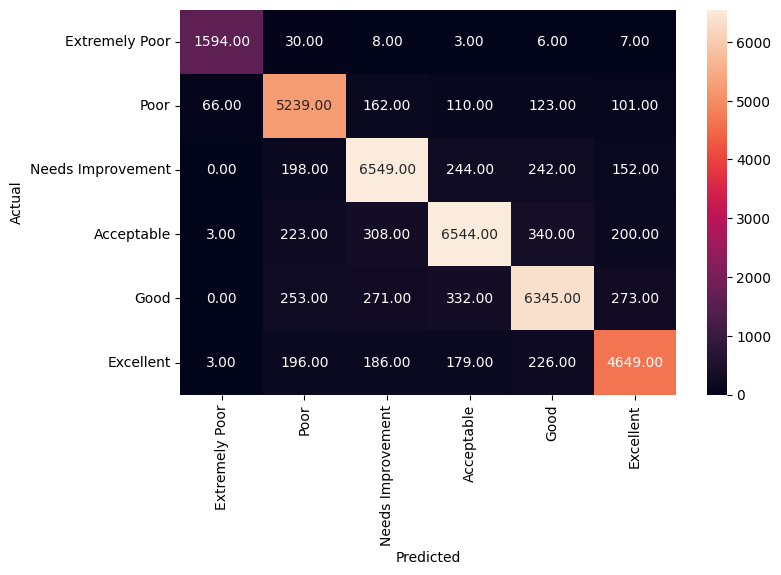

In [ ]:
# Checking performance on the test data
y_pred_test_rf = rf.predict(x_test)

test_rf_acc = metrics_score(y_test, y_pred_test_rf, target_column)

              precision    recall  f1-score   support

        -1.0   0.000000  0.000000  0.000000      8741
         0.0   0.893681  0.991049  0.939850      3910
         1.0   0.860413  0.970991  0.912364     13858
         2.0   0.873710  0.965124  0.917145     17978
         3.0   0.875985  0.957332  0.914853     18468
         4.0   0.874211  0.955701  0.913142     17969
         5.0   0.875459  0.957637  0.914706     13455

    accuracy                       0.873287     94379
   macro avg   0.750494  0.828262  0.787437     94379
weighted avg   0.792455  0.873287  0.830883     94379



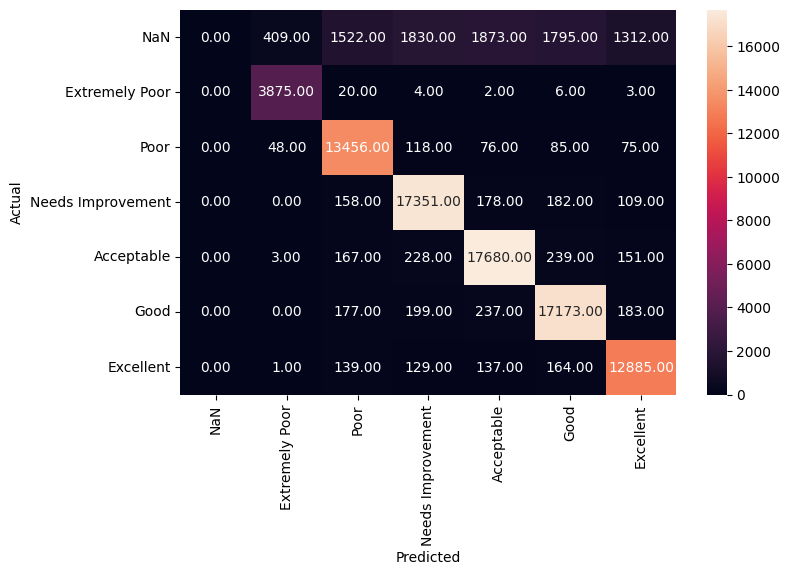

In [ ]:
# Checking performance on the all data
x_final_test = final_all[columns].fillna(-1)
y_final_test = final_all[target_column].fillna(-1)

y_pred_test_rf = rf.predict(x_final_test)

all_rf_acc = metrics_score(y_final_test, y_pred_test_rf, target_column)

In [ ]:
# Fitting the XGBoost-model
# Method 1) Use Cross-Validation on the dataset to find the best model.
X = df[columns]
y = df[target_column]

# cross-validator.
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=5)

# XGBoost Classifier
xgb_cv = XGBClassifier(
  random_state = 1,
  eval_metric = "mlogloss", # For multi-class use mlogloss
  tree_method = "hist",
  early_stopping_rounds = 4, # low number to avoid overfitting
)

# Pick the best from the cross validation above
xgb_cv = simple_XGB_optimation(xgb_cv, X, y, cv)

# Method 2) Use the current train/test chunks
xgb_m = XGBClassifier(random_state = 1, eval_metric = "mlogloss")
xgb_m = xgb_m.fit(x_train, y_train)

[0]	validation_0-mlogloss:1.25267
[1]	validation_0-mlogloss:1.00805
[2]	validation_0-mlogloss:0.85419
[3]	validation_0-mlogloss:0.75054
[4]	validation_0-mlogloss:0.67861
[5]	validation_0-mlogloss:0.62735
[6]	validation_0-mlogloss:0.59015
[7]	validation_0-mlogloss:0.56305
[8]	validation_0-mlogloss:0.54313
[9]	validation_0-mlogloss:0.52783
[10]	validation_0-mlogloss:0.51599
[11]	validation_0-mlogloss:0.50634
[12]	validation_0-mlogloss:0.49871
[13]	validation_0-mlogloss:0.49278
[14]	validation_0-mlogloss:0.48805
[15]	validation_0-mlogloss:0.48430
[16]	validation_0-mlogloss:0.48135
[17]	validation_0-mlogloss:0.47913
[18]	validation_0-mlogloss:0.47719
[19]	validation_0-mlogloss:0.47546
[20]	validation_0-mlogloss:0.47397
[21]	validation_0-mlogloss:0.47295
[22]	validation_0-mlogloss:0.47171
[23]	validation_0-mlogloss:0.47101
[24]	validation_0-mlogloss:0.47008
[25]	validation_0-mlogloss:0.46907
[26]	validation_0-mlogloss:0.46848
[27]	validation_0-mlogloss:0.46781
[28]	validation_0-mlogloss:0.4

              precision    recall  f1-score   support

         0.0   0.961171  0.976335  0.968694      1648
         1.0   0.863427  0.906740  0.884554      5801
         2.0   0.880194  0.883412  0.881800      7385
         3.0   0.878857  0.863744  0.871235      7618
         4.0   0.867755  0.853358  0.860496      7474
         5.0   0.867103  0.852914  0.859950      5439

    accuracy                       0.876290     35365
   macro avg   0.886418  0.889417  0.887788     35365
weighted avg   0.876287  0.876290  0.876162     35365



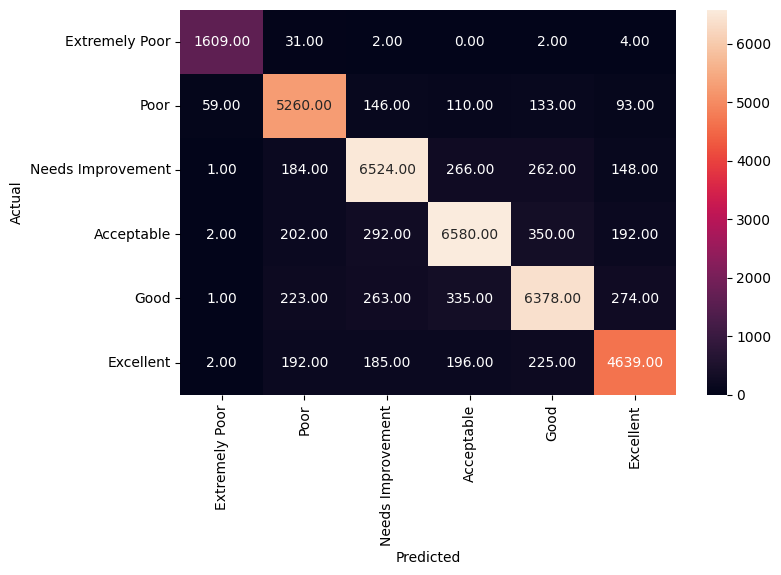

              precision    recall  f1-score   support

         0.0   0.969388  0.979976  0.974653      1648
         1.0   0.871475  0.916394  0.893370      5801
         2.0   0.889970  0.891537  0.890753      7385
         3.0   0.887978  0.881334  0.884643      7618
         4.0   0.883199  0.862992  0.872978      7474
         5.0   0.875586  0.859165  0.867298      5439

    accuracy                       0.886526     35365
   macro avg   0.896266  0.898566  0.897283     35365
weighted avg   0.886565  0.886526  0.886412     35365



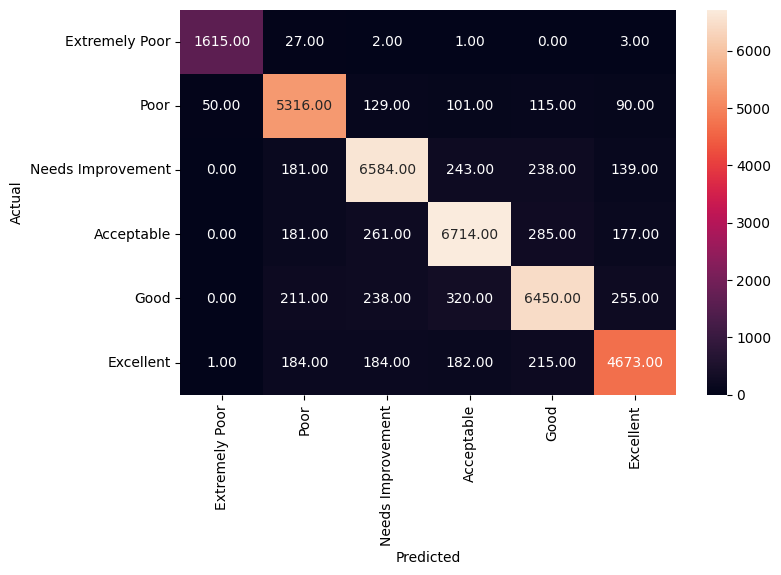

In [ ]:
# Checking performance on the test data
y_pred_test_xgb_m = xgb_m.predict(x_test)
y_pred_test_xgb_cv = xgb_cv.predict(x_test)

test_xgbm_acc = metrics_score(y_test, y_pred_test_xgb_m, target_column)
test_xgbcv_acc = metrics_score(y_test, y_pred_test_xgb_cv, target_column)

              precision    recall  f1-score   support

        -1.0   0.000000  0.000000  0.000000      8741
         0.0   0.886619  0.987980  0.934559      3910
         1.0   0.794447  0.922860  0.853852     13858
         2.0   0.813482  0.898098  0.853699     17978
         3.0   0.808663  0.881525  0.843523     18468
         4.0   0.801908  0.870054  0.834592     17969
         5.0   0.802187  0.861390  0.830735     13455

    accuracy                       0.808464     94379
   macro avg   0.701044  0.774558  0.735852     94379
weighted avg   0.733619  0.808464  0.769102     94379



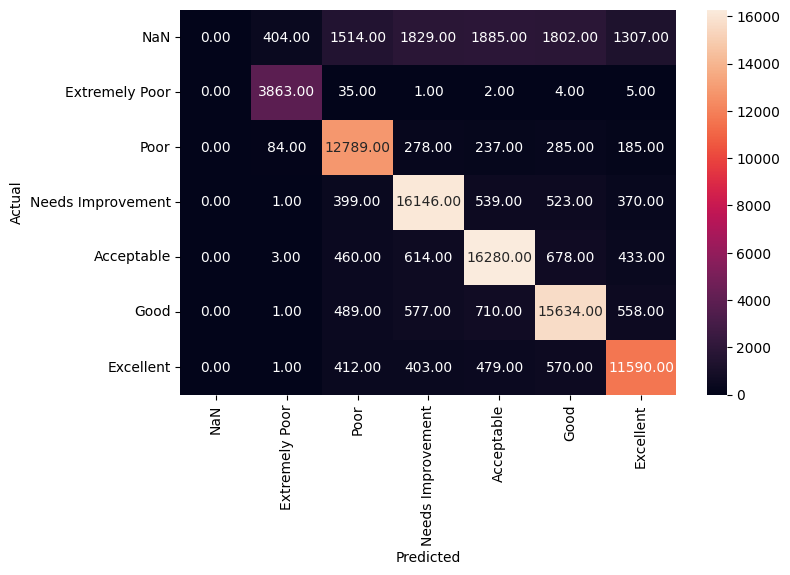

              precision    recall  f1-score   support

        -1.0   0.000000  0.000000  0.000000      8741
         0.0   0.881679  0.983376  0.929755      3910
         1.0   0.786897  0.915284  0.846249     13858
         2.0   0.806986  0.891868  0.847306     17978
         3.0   0.800999  0.877031  0.837292     18468
         4.0   0.798205  0.861150  0.828483     17969
         5.0   0.796644  0.853958  0.824306     13455

    accuracy                       0.802340     94379
   macro avg   0.695916  0.768952  0.730484     94379
weighted avg   0.728073  0.802340  0.763270     94379



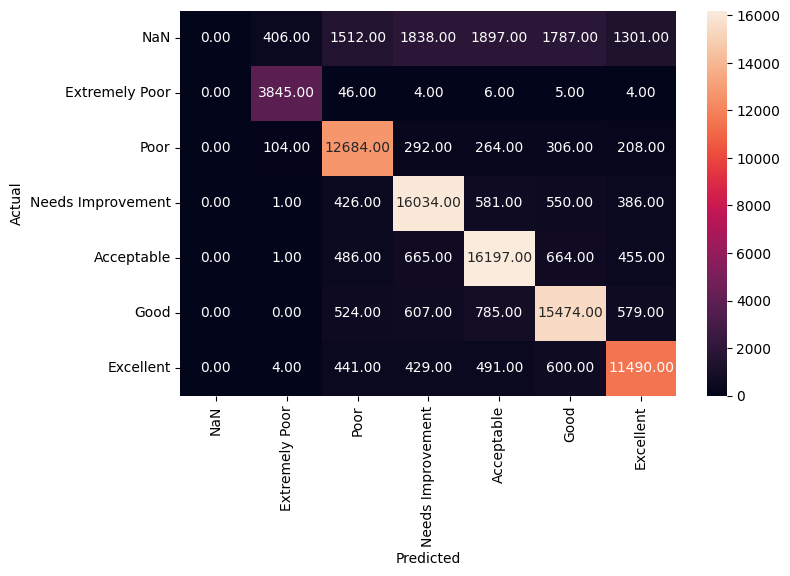

In [ ]:
# Checking performance on the all data
x_final_test = final_all[columns].fillna(-1)
y_final_test = final_all[target_column].fillna(-1)

y_pred_test_xgb_m = xgb_m.predict(x_final_test)
y_pred_test_xgb_cv = xgb_cv.predict(x_final_test)

all_xgbm_acc = metrics_score(y_final_test, y_pred_test_xgb_m, target_column)
all_xgbcv_acc = metrics_score(y_final_test, y_pred_test_xgb_cv, target_column)

### Update data based on models above.

In [ ]:
# Update data based on the model where missing values are.
x_final_all = final_all.loc[indices_all[target_column], columns]
x_final_test = final_test.loc[indices_test[target_column], columns]
# Which model to use? Choose the one with the best average accuacy!
x_final_model = max({
    rf: (test_rf_acc + all_rf_acc) ,
    xgb_m: (test_xgbm_acc + all_xgbm_acc),
    xgb_cv: (test_xgbcv_acc + all_xgbcv_acc)
  }.items(),
  key=lambda x: x[1]
)[0]
final_df.update(
    pd.Series(
        x_final_model.predict(x_final_all),
        name=target_column
    ).set_axis(indices_all[target_column]), # indices to update
)
final_all.update(
    pd.Series(
        x_final_model.predict(x_final_all),
        name=target_column
    ).set_axis(indices_all[target_column]), # indices to update
)
final_test.update(
    pd.Series(
        x_final_model.predict(x_final_test),
        name=target_column
    ).set_axis(indices_test[target_column]), #indices to update
)

### Onboard_Service

In [ ]:
target_column = 'Onboard_Service'
columns = base_columns.copy()

# Why not use the whole dataset = final_test + final_df. ID is unique across both dataframes.
df = pd.concat(
    [
        final_df[[*columns, target_column]].dropna(),
        final_test[[*columns, target_column]].dropna()
    ]
)
final_df[target_column].value_counts(),merged_df[target_column].value_counts()

(Onboard_Service
 4.0    27265
 5.0    21272
 3.0    18071
 2.0    11390
 1.0     8776
 0.0        4
 Name: count, dtype: int64,
 Onboard_Service
 Good                 27265
 Excellent            21272
 Acceptable           18071
 Needs Improvement    11390
 Poor                  8776
 Extremely Poor           4
 Name: count, dtype: int64)

In [ ]:
df

,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Gender_Female,Gender_Male,Age_0-13,Age_13-25,Age_25-40,Age_40-65,Age_65+,...,Cleanliness_Good,Cleanliness_Needs_Improvement,Cleanliness_Poor,Online_Boarding_Acceptable,Online_Boarding_Excellent,Online_Boarding_Extremely_Poor,Online_Boarding_Good,Online_Boarding_Needs_Improvement,Online_Boarding_Poor,Onboard_Service
ID,,,,,,,,,,,,,,,,,,,,,
98800001,272,0.0,5.0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,2.0
98800002,2200,9.0,0.0,0,1,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,5.0
98800003,1061,77.0,119.0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,5.0
98800004,780,13.0,18.0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,3.0
98800005,1981,0.0,0.0,1,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99935598,1334,0.0,0.0,0,1,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,4.0
99935599,1772,0.0,0.0,1,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,4.0
99935600,1180,0.0,0.0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1.0


In [ ]:
# Create train and test datasets
pcnt = .7

# Random state is a seed value
train = df.sample(frac = pcnt, random_state = 14)
test = df.drop(train.index)

x_train = train[columns]
x_test = test[columns]

y_train = train[target_column]
y_test = test[target_column]

np.random.seed(0)

In [ ]:
rf = RandomForestClassifier(random_state = 1, criterion = 'entropy', class_weight = 'balanced')
rf = rf.fit(x_train, y_train)

              precision    recall  f1-score   support

         0.0   1.000000  1.000000  1.000000         1
         1.0   0.419336  0.398847  0.408835      3643
         2.0   0.549273  0.493674  0.519991      4742
         3.0   0.469645  0.505982  0.487137      7522
         4.0   0.628724  0.672757  0.649996     11166
         5.0   0.735505  0.676350  0.704688      8778

    accuracy                       0.587136     35852
   macro avg   0.633747  0.624602  0.628441     35852
weighted avg   0.589718  0.587136  0.587527     35852



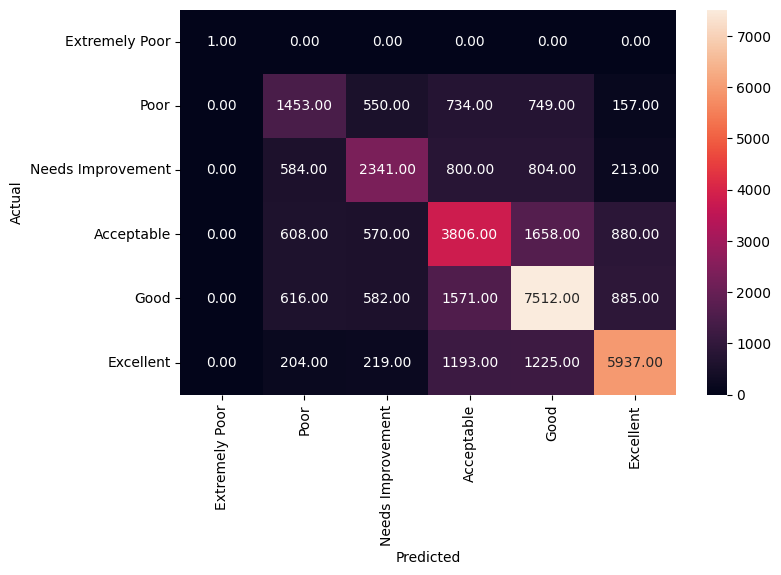

In [ ]:
# Checking performance on the test data
y_pred_test_rf = rf.predict(x_test)

test_rf_acc = metrics_score(y_test, y_pred_test_rf, target_column)

              precision    recall  f1-score   support

        -1.0   0.000000  0.000000  0.000000      7601
         0.0   0.800000  1.000000  0.888889         4
         1.0   0.763939  0.821217  0.791543      8776
         2.0   0.807175  0.847498  0.826845     11390
         3.0   0.760795  0.851143  0.803437     18071
         4.0   0.810880  0.900458  0.853325     27265
         5.0   0.854449  0.903253  0.878174     21272

    accuracy                       0.805370     94379
   macro avg   0.685320  0.760510  0.720316     94379
weighted avg   0.740992  0.805370  0.771710     94379



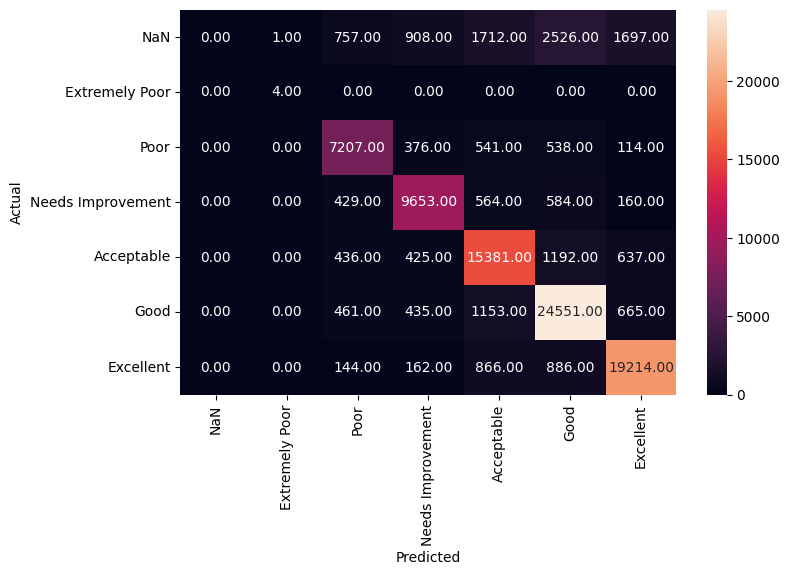

In [ ]:
# Checking performance on the all data
x_final_test = final_all[columns].fillna(-1)
y_final_test = final_all[target_column].fillna(-1)

y_pred_test_rf = rf.predict(x_final_test)

all_rf_acc = metrics_score(y_final_test, y_pred_test_rf, target_column)

In [ ]:
# Fitting the XGBoost-model
# Method 1) Use Cross-Validation on the dataset to find the best model.
X = df[columns]
y = df[target_column]

# cross-validator.
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=5)

# XGBoost Classifier
xgb_cv = XGBClassifier(
  random_state = 1,
  eval_metric = "mlogloss", # For multi-class use mlogloss
  tree_method = "hist",
  early_stopping_rounds = 4, # low number to avoid overfitting
)

# Pick the best from the cross validation above
xgb_cv = simple_XGB_optimation(xgb_cv, X, y, cv)

# Method 2) Use the current train/test chunks
xgb_m = XGBClassifier(random_state = 1, eval_metric = "mlogloss")
xgb_m = xgb_m.fit(x_train, y_train)

[0]	validation_0-mlogloss:1.42385
[1]	validation_0-mlogloss:1.26098
[2]	validation_0-mlogloss:1.15715
[3]	validation_0-mlogloss:1.08459
[4]	validation_0-mlogloss:1.03185
[5]	validation_0-mlogloss:0.99190
[6]	validation_0-mlogloss:0.96091
[7]	validation_0-mlogloss:0.93680
[8]	validation_0-mlogloss:0.91842
[9]	validation_0-mlogloss:0.90315
[10]	validation_0-mlogloss:0.89152
[11]	validation_0-mlogloss:0.88209
[12]	validation_0-mlogloss:0.87491
[13]	validation_0-mlogloss:0.86829
[14]	validation_0-mlogloss:0.86366
[15]	validation_0-mlogloss:0.85916
[16]	validation_0-mlogloss:0.85591
[17]	validation_0-mlogloss:0.85280
[18]	validation_0-mlogloss:0.85037
[19]	validation_0-mlogloss:0.84822
[20]	validation_0-mlogloss:0.84702
[21]	validation_0-mlogloss:0.84567
[22]	validation_0-mlogloss:0.84478
[23]	validation_0-mlogloss:0.84364
[24]	validation_0-mlogloss:0.84297
[25]	validation_0-mlogloss:0.84230
[26]	validation_0-mlogloss:0.84188
[27]	validation_0-mlogloss:0.84130
[28]	validation_0-mlogloss:0.8

              precision    recall  f1-score   support

         0.0   1.000000  1.000000  1.000000         1
         1.0   0.408528  0.407631  0.408079      3643
         2.0   0.534287  0.496204  0.514542      4742
         3.0   0.466607  0.482053  0.474204      7522
         4.0   0.633590  0.662189  0.647574     11166
         5.0   0.711623  0.678628  0.694734      8778

    accuracy                       0.580609     35852
   macro avg   0.625773  0.621118  0.623189     35852
weighted avg   0.581668  0.580609  0.580825     35852



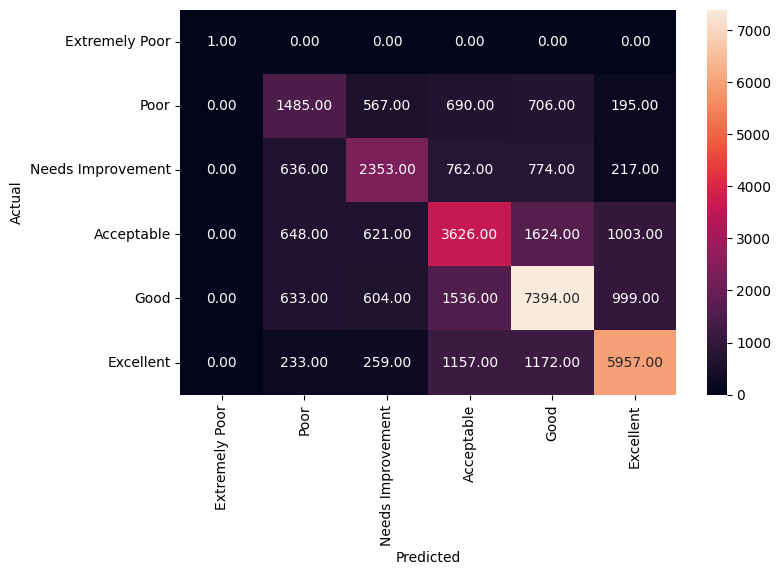

              precision    recall  f1-score   support

         0.0   1.000000  1.000000  1.000000         1
         1.0   0.525267  0.513588  0.519362      3643
         2.0   0.618559  0.584774  0.601192      4742
         3.0   0.553688  0.564876  0.559226      7522
         4.0   0.681125  0.724252  0.702027     11166
         5.0   0.775518  0.729665  0.751893      8778

    accuracy                       0.652293     35852
   macro avg   0.692359  0.686193  0.688950     35852
weighted avg   0.653395  0.652293  0.652386     35852



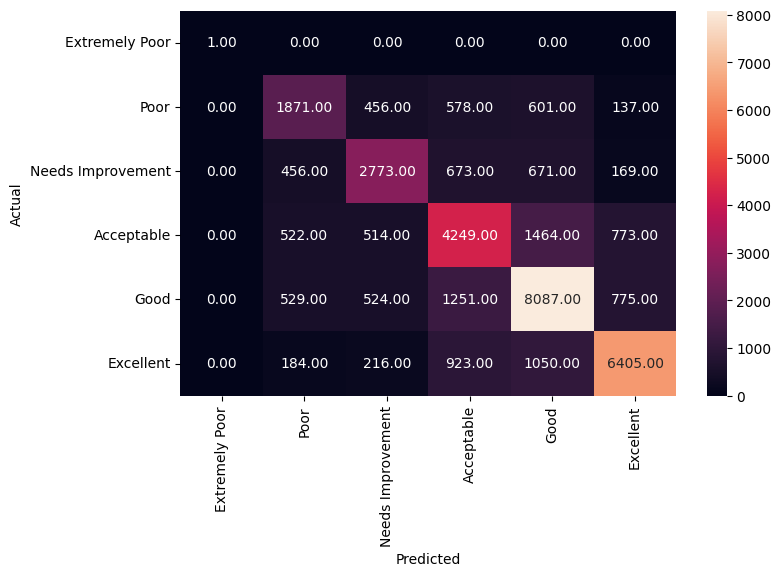

In [ ]:
# Checking performance on the test data
y_pred_test_xgb_m = xgb_m.predict(x_test)
y_pred_test_xgb_cv = xgb_cv.predict(x_test)

test_xgbm_acc = metrics_score(y_test, y_pred_test_xgb_m, target_column)
test_xgbcv_acc = metrics_score(y_test, y_pred_test_xgb_cv, target_column)

              precision    recall  f1-score   support

        -1.0   0.000000  0.000000  0.000000      7601
         0.0   0.800000  1.000000  0.888889         4
         1.0   0.537695  0.584321  0.560039      8776
         2.0   0.631247  0.649868  0.640422     11390
         3.0   0.563424  0.628742  0.594293     18071
         4.0   0.670900  0.757491  0.711571     27265
         5.0   0.736790  0.767582  0.751871     21272

    accuracy                       0.645027     94379
   macro avg   0.562865  0.626858  0.592441     94379
weighted avg   0.593974  0.645027  0.618222     94379



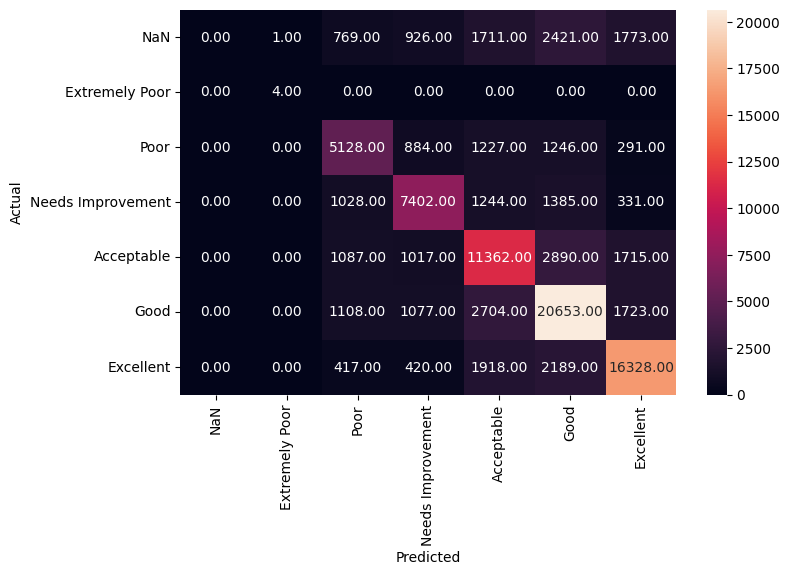

              precision    recall  f1-score   support

        -1.0   0.000000  0.000000  0.000000      7601
         0.0   0.800000  1.000000  0.888889         4
         1.0   0.480972  0.509799  0.494966      8776
         2.0   0.577203  0.591747  0.584385     11390
         3.0   0.514144  0.573294  0.542110     18071
         4.0   0.628948  0.727379  0.674592     27265
         5.0   0.712430  0.727200  0.719739     21272

    accuracy                       0.602666     94379
   macro avg   0.530528  0.589917  0.557812     94379
weighted avg   0.555131  0.602666  0.577491     94379



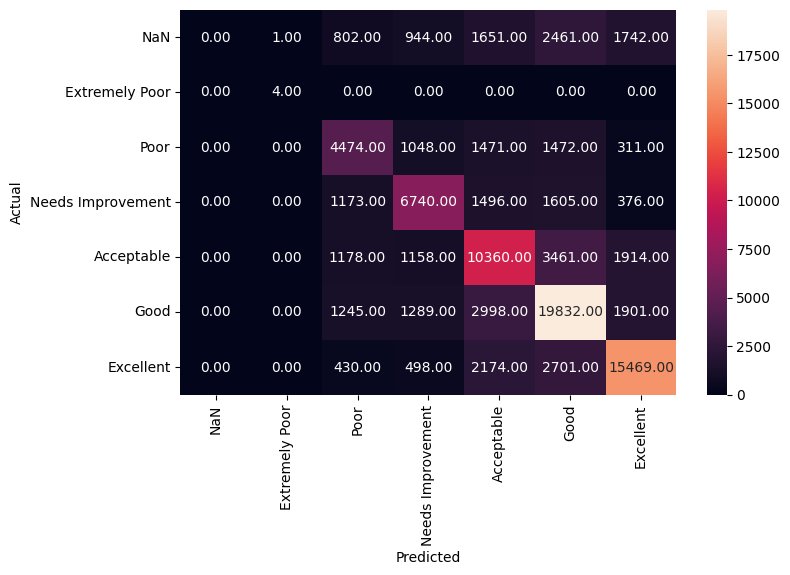

In [ ]:
# Checking performance on the all data
x_final_test = final_all[columns].fillna(-1)
y_final_test = final_all[target_column].fillna(-1)

y_pred_test_xgb_m = xgb_m.predict(x_final_test)
y_pred_test_xgb_cv = xgb_cv.predict(x_final_test)

all_xgbm_acc = metrics_score(y_final_test, y_pred_test_xgb_m, target_column)
all_xgbcv_acc = metrics_score(y_final_test, y_pred_test_xgb_cv, target_column)

### Update data based on models above.

In [ ]:
# Update data based on the model where missing values are.
x_final_all = final_all.loc[indices_all[target_column], columns]
x_final_test = final_test.loc[indices_test[target_column], columns]
# Which model to use? Choose the one with the best average accuacy!
x_final_model = max({
    rf: (test_rf_acc + all_rf_acc) ,
    xgb_m: (test_xgbm_acc + all_xgbm_acc),
    xgb_cv: (test_xgbcv_acc + all_xgbcv_acc)
  }.items(),
  key=lambda x: x[1]
)[0]
final_df.update(
    pd.Series(
        x_final_model.predict(x_final_all),
        name=target_column
    ).set_axis(indices_all[target_column]), # indices to update
)
final_all.update(
    pd.Series(
        x_final_model.predict(x_final_all),
        name=target_column
    ).set_axis(indices_all[target_column]), # indices to update
)
final_test.update(
    pd.Series(
        x_final_model.predict(x_final_test),
        name=target_column
    ).set_axis(indices_test[target_column]), #indices to update
)

In [ ]:
final_df.isna().sum().sum(),final_test.isna().sum().sum(),final_all.isna().sum().sum()

(0, 0, 0)

## **Splitting the dataset**


In [ ]:
# We need to encode the just modelled variables with the dummie method if it has been selected.
if encoding_method == 'get_dummies':
    # First back-transfer to original string.
    decode_binary = { 'Customer_Type': ['Loyal Customer', 'Disloyal Customer'], 'Type_Travel': ['Personal Travel', 'Business Travel']}
    final_df = final_df.assign(**{
      col: lambda x, c=col: [decode_binary[c][y] for y in x[c]] for col in defer_columns[0:2] if col in final_df.columns
    })
    final_test = final_test.assign(**{
      col: lambda x, c=col: [decode_binary[c][y] for y in x[c]] for col in defer_columns[0:2] if col in final_test.columns
    })
    final_all = final_all.assign(**{
      col: lambda x, c=col: [decode_binary[c][y] for y in x[c]] for col in defer_columns[0:2] if col in final_all.columns
    })
    final_df = final_df.assign(**{
      col: lambda x, c=col: [numeric_to_rating(y) for y in x[c]] for col in defer_columns[2:] if col in final_df.columns
    })
    final_test = final_test.assign(**{
      col: lambda x, c=col: [numeric_to_rating(y) for y in x[c]] for col in defer_columns[2:] if col in final_test.columns
    })
    final_all = final_all.assign(**{
      col: lambda x, c=col: [numeric_to_rating(y) for y in x[c]] for col in defer_columns[2:] if col in final_all.columns
    })
    # Then apply the get_dummies method.
    final_df = pd.get_dummies(final_df, columns=defer_columns, dtype=int)
    final_test = pd.get_dummies(final_test, columns=defer_columns, dtype=int)
    final_all = pd.get_dummies(final_all, columns=defer_columns, dtype=int)
    # Add zero columns to data frames with missing columns after call to get_dummie (where categorial values were missing)
    # Needed to make test dataset compatible.
    cols = set(final_test.columns).union(set(final_all.columns)).union(set(final_df.columns))
    cols.discard('Overall_Experience')
    final_df = final_df.assign(**{ col: 0 for col in cols.difference(set(final_df.columns.tolist())) })
    final_test = final_test.assign(**{ col: 0 for col in cols.difference(set(final_test.columns.tolist())) })
    final_all = final_all.assign(**{ col: 0 for col in cols.difference(set(final_all.columns.tolist())) })
    # Also remove spaces in new column names to be in sync to other column names.
    final_df.rename(columns=lambda x: x.replace(" ","_"), inplace=True)
    final_test.rename(columns=lambda x: x.replace(" ","_"), inplace=True)
    final_all.rename(columns=lambda x: x.replace(" ","_"), inplace=True)

In [ ]:
# Create train and test datasets
pcnt = .7
target_column = 'Overall_Experience'

# Random state is a seed value
train = final_df.sample(frac = pcnt, random_state = 14)
test = final_df.drop(train.index)

columns = final_df.columns.to_list()
columns.remove(target_column)

x_train = train[columns]
x_test = test[columns]

y_train = train[target_column]
y_test = test[target_column]

np.random.seed(0)

## **Random Forest**

In [ ]:
rf = RandomForestClassifier(random_state = 1, criterion = 'entropy', class_weight = 'balanced')
rf = rf.fit(x_train, y_train)

              precision    recall  f1-score   support

           0   0.939795  0.955631  0.947647     12937
           1   0.962135  0.948495  0.955266     15377

    accuracy                       0.951755     28314
   macro avg   0.950965  0.952063  0.951456     28314
weighted avg   0.951927  0.951755  0.951785     28314



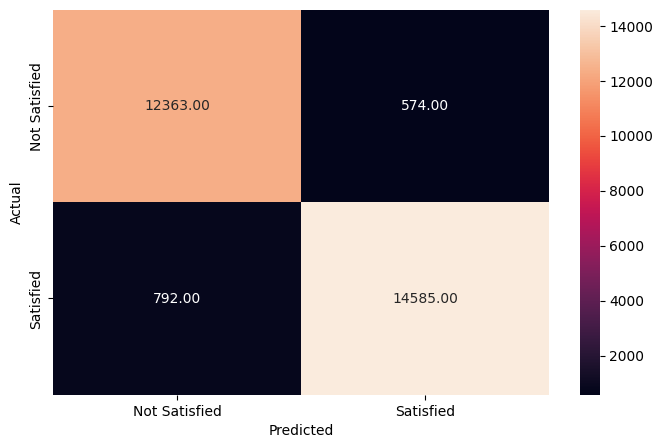

In [ ]:
# Checking performance on the test data
y_pred_test_rf_tuned = rf.predict(x_test)

test_rf_acc = metrics_score(y_test, y_pred_test_rf_tuned, target_column)

              precision    recall  f1-score   support

           0   0.981583  0.986584  0.984077     42786
           1   0.988827  0.984649  0.986734     51593

    accuracy                       0.985526     94379
   macro avg   0.985205  0.985617  0.985406     94379
weighted avg   0.985543  0.985526  0.985530     94379



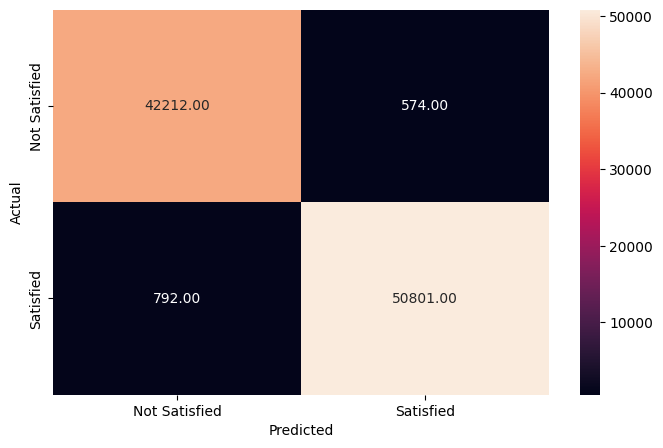

In [ ]:
# Checking performance on the all data
x_final_test = final_all[columns]
y_final_test = final_all['Overall_Experience']

y_pred_test_rf_tuned = rf.predict(x_final_test)

all_rf_acc = metrics_score(y_final_test, y_pred_test_rf_tuned, target_column)

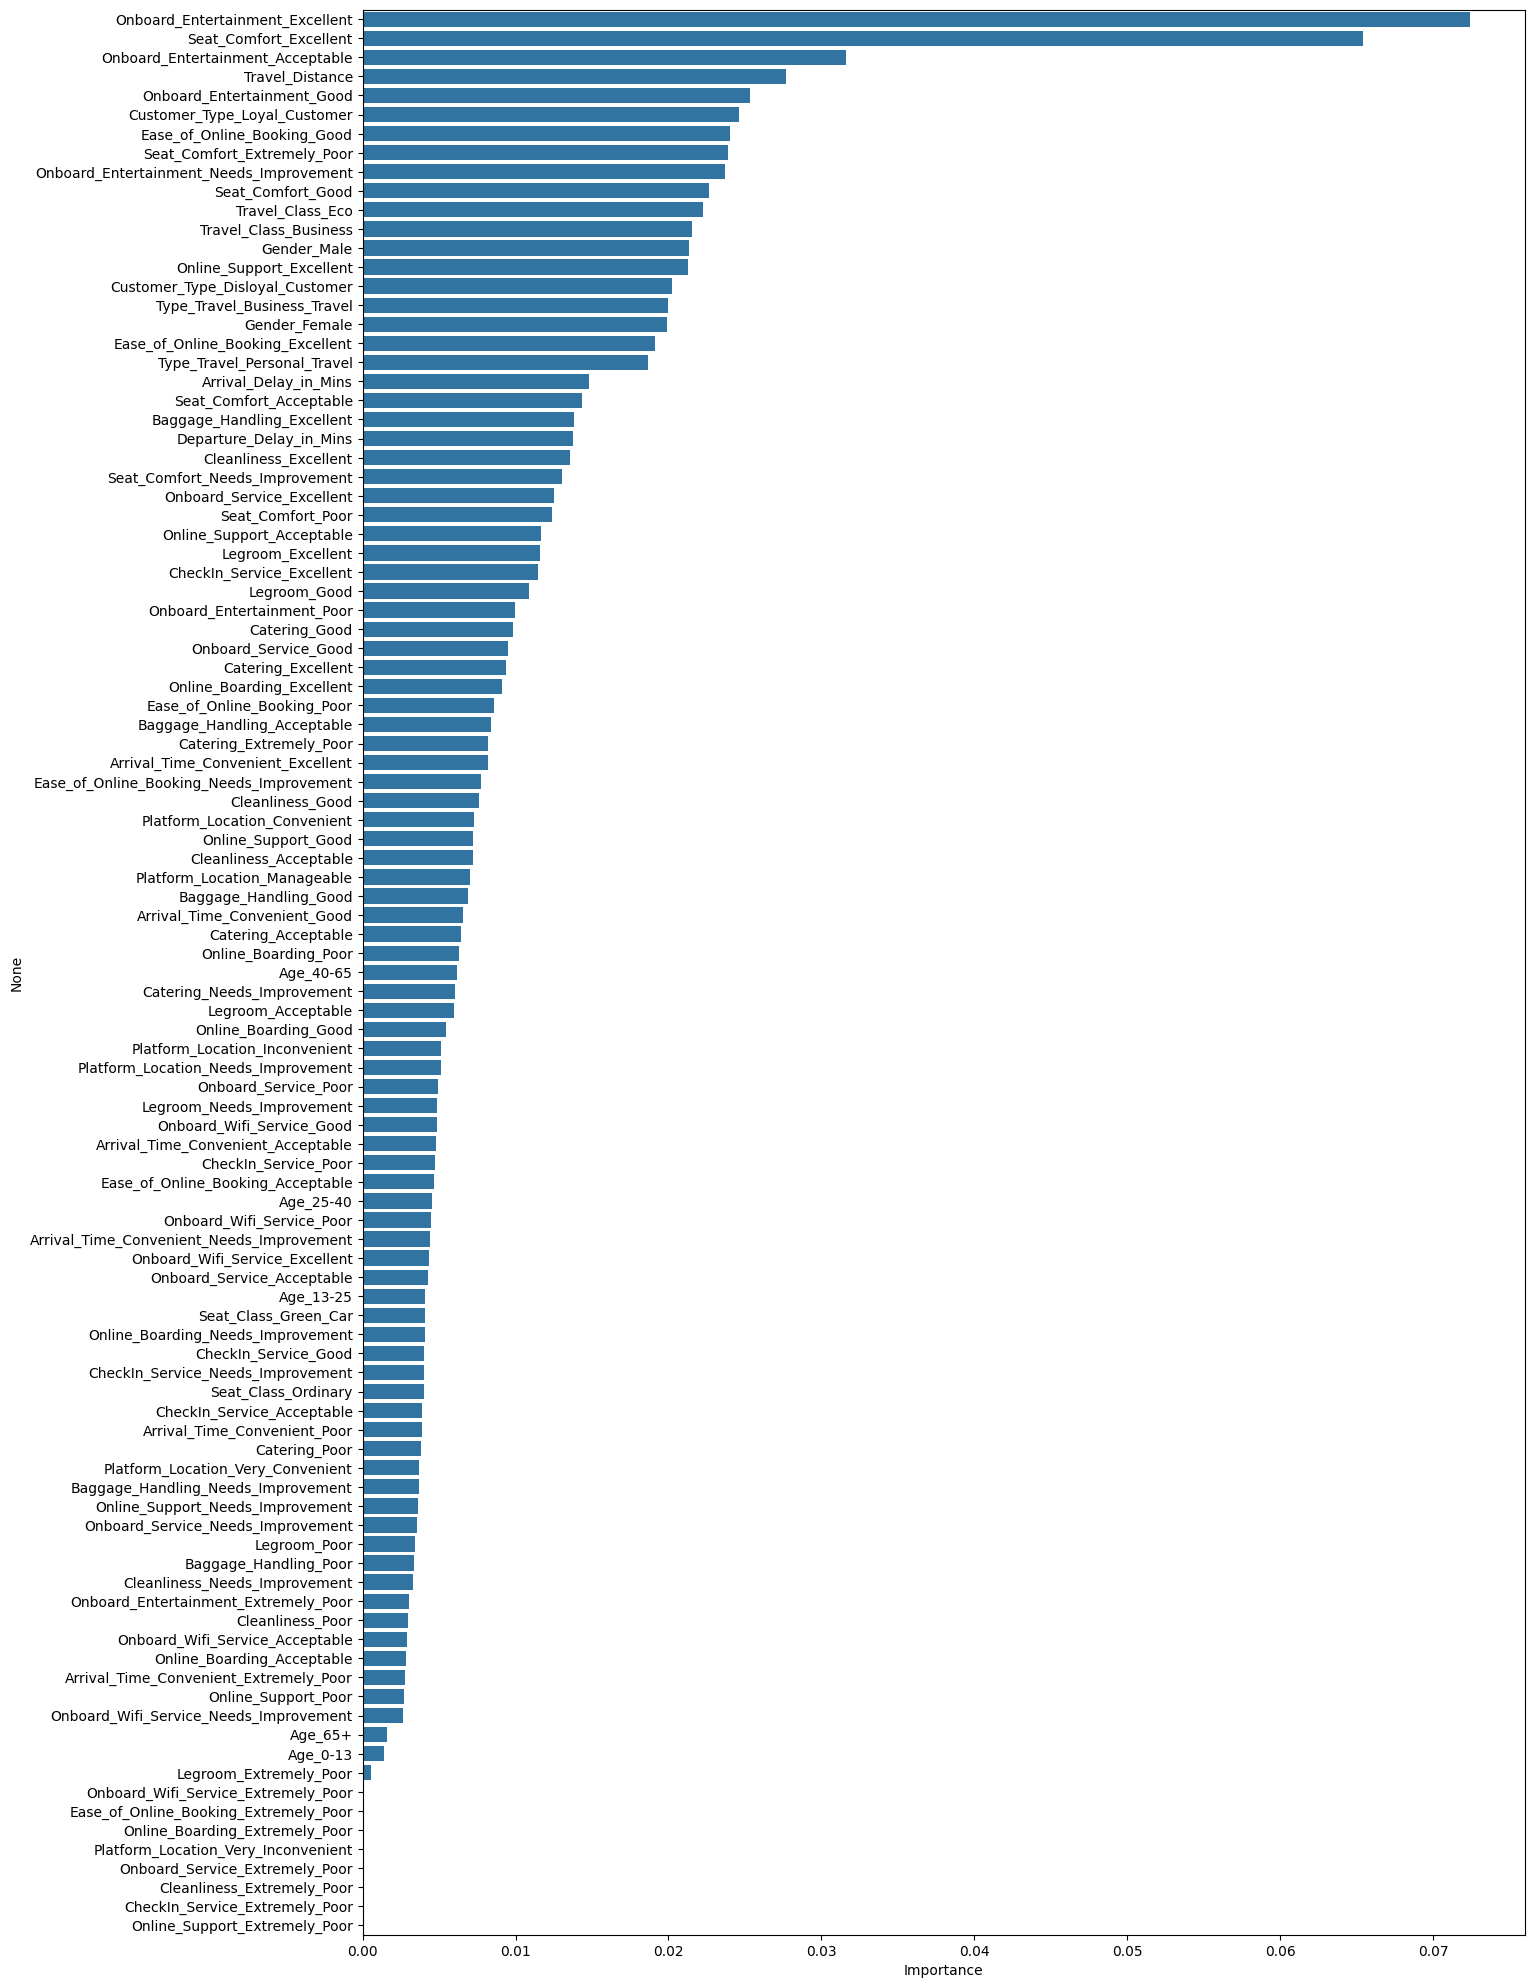

In [ ]:
# Plot the feature importance

importances = rf.feature_importances_

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (15, 25) if encoding_method == 'get_dummies' else (10, 10))

sns.barplot(x=importance_df.Importance,y=importance_df.index);

In [ ]:
prediction = pd.DataFrame({'ID' : final_test.index, 'Overall_Experience': rf.predict(final_test[columns])})
prediction.to_csv(results_directory + 'submission_rf_' + ( 'GD' if encoding_method == 'get_dummies' else 'FR2N') + '_v17.csv', index = False)

## **XGBoost**

In [ ]:
# Fitting the XGBoost-model
# Method 1) Use Cross-Validation on the dataset to find the best model.
X = final_df[columns]
y = final_df[target_column]

# cross-validator.
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=5)

# XGBoost Classifier
xgb_cv = XGBClassifier(
  random_state = 1,
  eval_metric = "logloss", # For multi-class use mlogloss
  tree_method = "hist",
  early_stopping_rounds = 4, # low number to avoid overfitting
)

# Pick the best from the cross validation above
xgb_cv = simple_XGB_optimation(xgb_cv, X, y, cv)

# Method 2) Use the current train/test chunks
xgb_m = XGBClassifier(random_state = 1, eval_metric = "logloss")
xgb_m = xgb_m.fit(x_train, y_train)

[0]	validation_0-logloss:0.52205
[1]	validation_0-logloss:0.43123
[2]	validation_0-logloss:0.37422
[3]	validation_0-logloss:0.33224
[4]	validation_0-logloss:0.29510
[5]	validation_0-logloss:0.26556
[6]	validation_0-logloss:0.23944
[7]	validation_0-logloss:0.22336
[8]	validation_0-logloss:0.20859
[9]	validation_0-logloss:0.19560
[10]	validation_0-logloss:0.18649
[11]	validation_0-logloss:0.17831
[12]	validation_0-logloss:0.17230
[13]	validation_0-logloss:0.16882
[14]	validation_0-logloss:0.16421
[15]	validation_0-logloss:0.15820
[16]	validation_0-logloss:0.15661
[17]	validation_0-logloss:0.15373
[18]	validation_0-logloss:0.15149
[19]	validation_0-logloss:0.14716
[20]	validation_0-logloss:0.14611
[21]	validation_0-logloss:0.14357
[22]	validation_0-logloss:0.14121
[23]	validation_0-logloss:0.13820
[24]	validation_0-logloss:0.13670
[25]	validation_0-logloss:0.13638
[26]	validation_0-logloss:0.13381
[27]	validation_0-logloss:0.13094
[28]	validation_0-logloss:0.13059
[29]	validation_0-loglos

              precision    recall  f1-score   support

           0   0.942599  0.951998  0.947275     12937
           1   0.959273  0.951226  0.955233     15377

    accuracy                       0.951579     28314
   macro avg   0.950936  0.951612  0.951254     28314
weighted avg   0.951655  0.951579  0.951597     28314



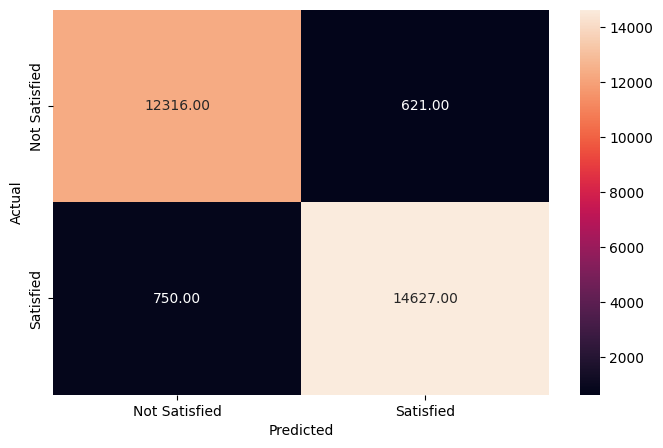

              precision    recall  f1-score   support

           0   0.954126  0.967844  0.960936     12937
           1   0.972615  0.960851  0.966697     15377

    accuracy                       0.964046     28314
   macro avg   0.963371  0.964347  0.963817     28314
weighted avg   0.964168  0.964046  0.964065     28314



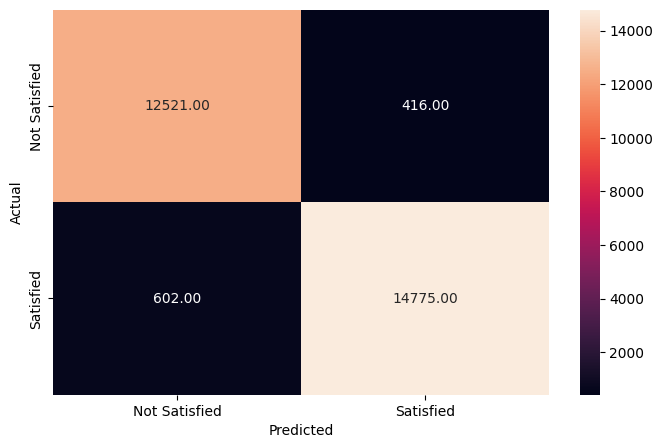

In [ ]:
# Checking performance on the test data
y_pred_test_xgb_m = xgb_m.predict(x_test)
y_pred_test_xgb_cv = xgb_cv.predict(x_test)

test_xgbm_acc = metrics_score(y_test, y_pred_test_xgb_m, target_column)
test_xgbcv_acc = metrics_score(y_test, y_pred_test_xgb_cv, target_column)

              precision    recall  f1-score   support

           0   0.957596  0.969055  0.963292     42786
           1   0.974080  0.964414  0.969223     51593

    accuracy                       0.966518     94379
   macro avg   0.965838  0.966735  0.966257     94379
weighted avg   0.966607  0.966518  0.966534     94379



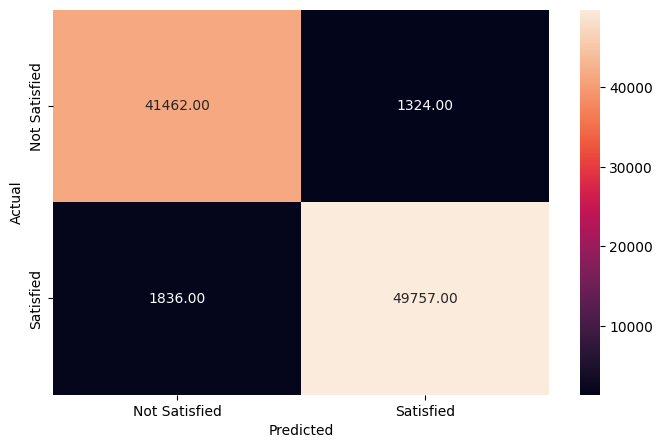

              precision    recall  f1-score   support

           0   0.954822  0.968658  0.961690     42786
           1   0.973692  0.961991  0.967806     51593

    accuracy                       0.965013     94379
   macro avg   0.964257  0.965324  0.964748     94379
weighted avg   0.965137  0.965013  0.965033     94379



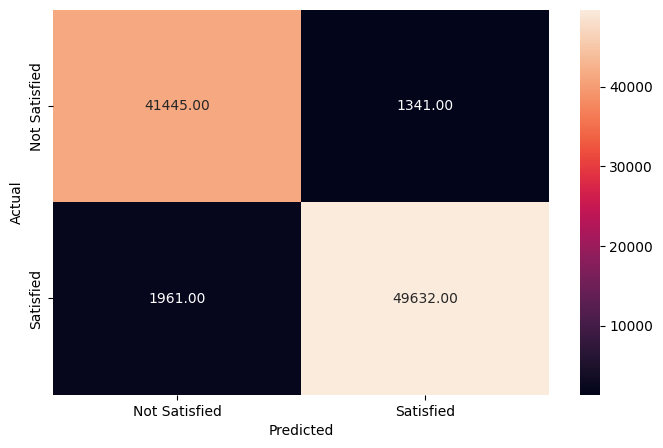

In [ ]:
# Checking performance on the all data
x_final_test = final_all[columns].fillna(-1)
y_final_test = final_all[target_column].fillna(-1)

y_pred_test_xgb_m = xgb_m.predict(x_final_test)
y_pred_test_xgb_cv = xgb_cv.predict(x_final_test)

all_xgbm_acc = metrics_score(y_final_test, y_pred_test_xgb_m, target_column)
all_xgbcv_acc = metrics_score(y_final_test, y_pred_test_xgb_cv, target_column)

In [ ]:
prediction = pd.DataFrame({'ID' : final_test.index, 'Overall_Experience': xgb_m.predict(final_test[columns])})
prediction.to_csv(results_directory + 'submission_xgbm_' + ( 'GD' if encoding_method == 'get_dummies' else 'FR2N') + '_v17.csv', index = False)
prediction = pd.DataFrame({'ID' : final_test.index, 'Overall_Experience': xgb_cv.predict(final_test[columns])})
prediction.to_csv(results_directory + 'submission_xgbcv_' + ( 'GD' if encoding_method == 'get_dummies' else 'FR2N') + '_v17.csv', index = False)

In [ ]:
pd.DataFrame({
    'Random Forest': [test_rf_acc , all_rf_acc, (test_rf_acc + all_rf_acc)/2.0],
    'XGBoost Manual': [test_xgbm_acc, all_xgbm_acc, (test_xgbm_acc + all_xgbm_acc)/2.0],
    'XGBoost CV': [test_xgbcv_acc, all_xgbcv_acc, (test_xgbcv_acc + all_xgbcv_acc)/2.0]
  },
  columns = pd.Index(['Random Forest','XGBoost Manual', 'XGBoost CV'], name='Model:'),
  index = pd.Index(['Test Data','All Data', 'Average'], name='Data Source'),
).style.format('{:.3f}')

Model:,Random Forest,XGBoost Manual,XGBoost CV
Data Source,,,
Test Data,0.952,0.952,0.964
All Data,0.986,0.967,0.965
Average,0.969,0.959,0.965
